# MD004 ENTREGA8 NAIVE BAYES & ANÁLISIS DE SENTIMIENTO


###### **Trabajo del Tema 8**

**Descripción de la tarea:**

El csv adjunto incluye reviews que han dejado usuarios en la Google Play Store en referencia a 23 apps, incluyendo una valoración categórica sobre el análisis de sentimiento. Los datos son los siguientes:

- package_name: Nombre de la app
- review: Texto del usuario con la review
- polarity: Sentimiento de polaridad de la review:
    - 1: Review con un sentimiento muy positivo o muy negativo
    - 0: Review con un sentimiento neutro (-->realizo una pequeña corrección, el enunciado ponía '2')

**Se pide:**

1. **Limpieza de instancias (3.5p)**: Limpieza de texto de las instancias. Se valorará el uso de las técnicas empleadas y las explicaciones en el notebook
2. **Creación de modelo clasificador de Naive Bayes (3.5p)**: Se valorará el uso de técnicas empleadas como el split entre entrenamiento y validación y selección de métrica de optimización
3. **Optimización del modelo (2p)**: En base a los resultados obtenidos, ¿Somos capaces de mejorar nuestro modelo? Se valorará el uso de ténicas como Laplace smoothing, uso de
la variable categórica package_name
4. **Conclusiones y vías abiertas (1p)**: ¿Qué resultados obtenemos en el modelo?, ¿Predice correctamente?, ¿En todas las apps?, ¿Qué datos podrían ayudarnos a mejorar la predicción?

**>> este ejercicio no tiene una solución única<<** Muchas opciones pueden ser válidas, pero se espera que se haga una interpretación de los datos obtenidos en todos los puntos y que se construya un modelo de Naive Bayes acorde a lo analizado (Si la clasificación es válida, por qué lo es y si no llega a serlo, por qué no lo es y cómo podrían mejorarse los resultados)

<font color='red'> **Entrega: fichero Jupyter Notebook con MD004NombreApellidosAC08.ipynb y fichero .pdf con MD004NombreApellidosAC08.pdf** </font>

# Carga de paquetes

In [2]:
install.packages('slam')
install.packages('tm')
install.packages('SnowballC')
install.packages('gmodels')
install.packages('wordcloud')
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘Rcpp’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [3]:
install.packages('gridExtra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [5]:
library(e1071)
library(tm)
library(SnowballC)
library(wordcloud)
library(gmodels)
library(wordcloud)
library(caret)
library(gridExtra)

Loading required package: NLP

Loading required package: RColorBrewer

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


Loading required package: lattice



In [293]:
data = read.csv(file='sentiment_dataset.csv', header=TRUE, sep=',', dec='.')

# Exploración de los Datos

In [294]:
head(data)
tail(data)

,package_name,review,polarity
,<chr>,<chr>,<int>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",0


,package_name,review,polarity
,<chr>,<chr>,<int>
886,com.rovio.angrybirds,too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance.,1
887,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1
888,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1
889,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0
890,com.rovio.angrybirds,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1
891,com.rovio.angrybirds,they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 đ because nothing's perfect,1


In [295]:
str(data)

'data.frame':	891 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : int  0 0 0 0 0 0 0 0 0 0 ...


In [296]:
# Valores nulos
sum(is.na(data))

[1] 0

In [297]:
# Proporción de clases
round(prop.table(table(data$polarity))*100, digits = 1)


   0    1 
65.5 34.5 

In [298]:
# Establecemos el tipo de dato a factor
data$polarity = factor(data$polarity)


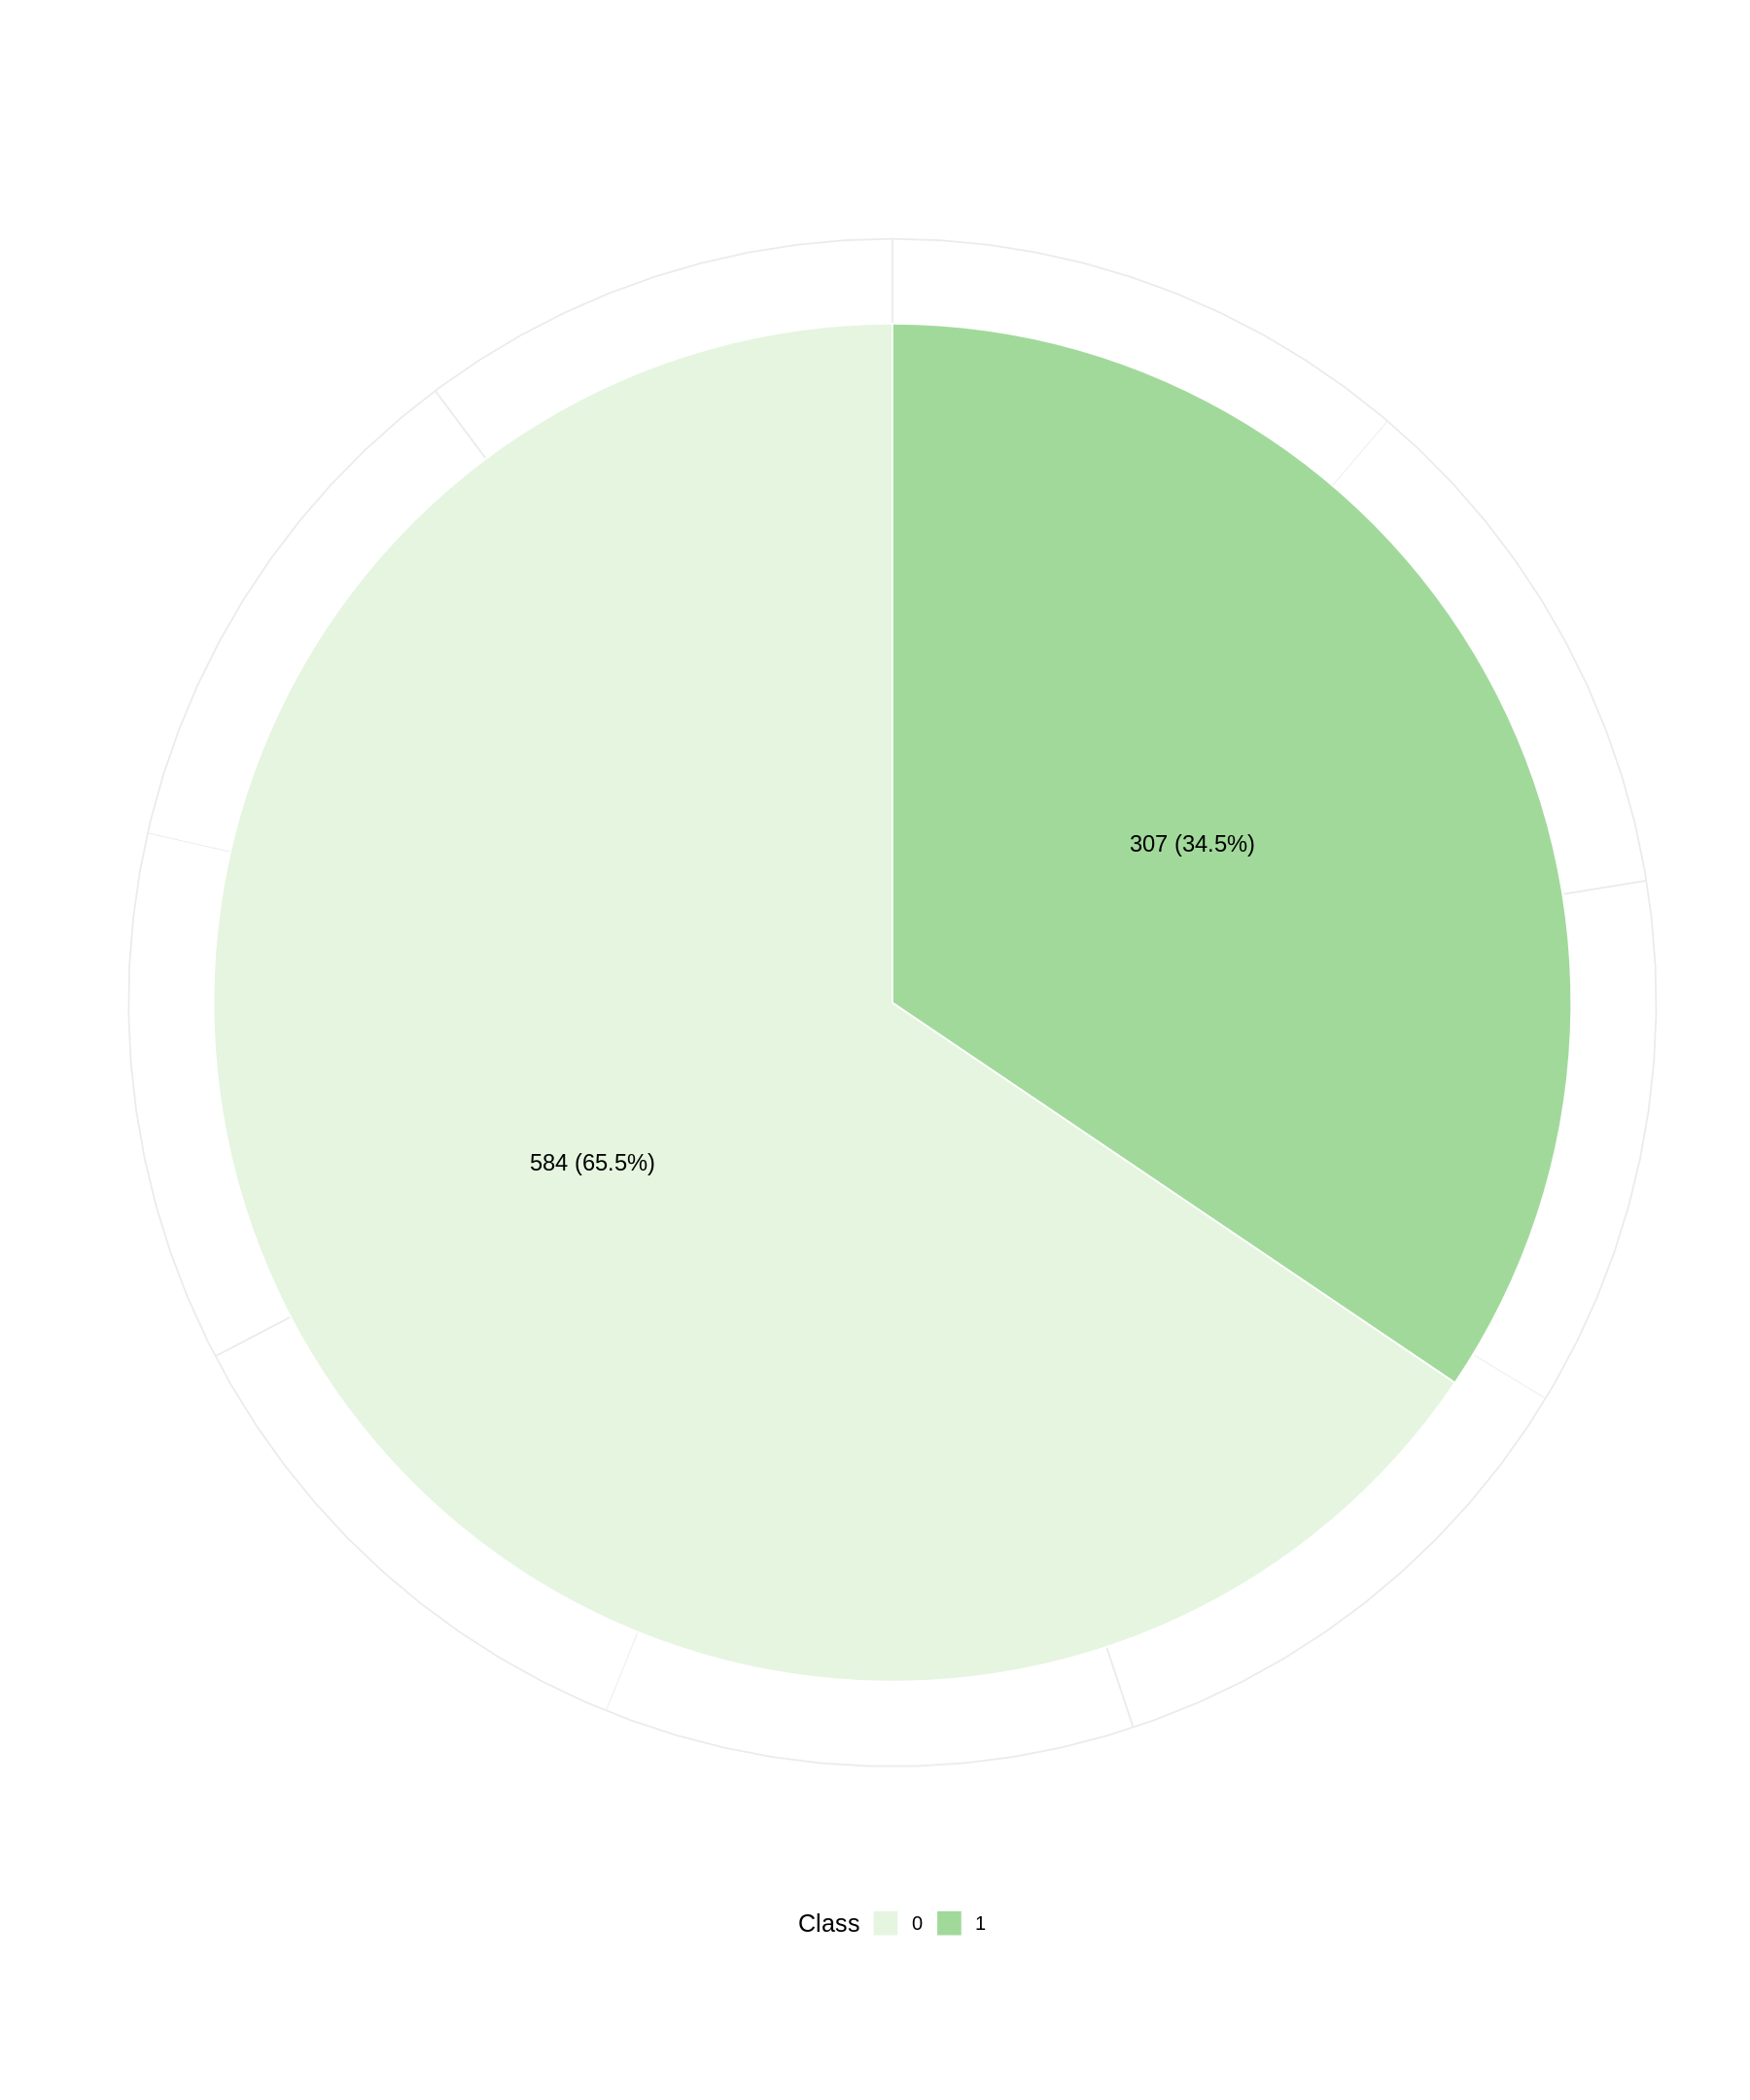

In [299]:
# Crear un gráfico de pie
ggplot(data, aes(x = "", fill = as.factor(!!sym("polarity")))) +
  geom_bar(stat = "count", width = 1, color = "white") +
  coord_polar("y") +
  scale_fill_brewer(palette = "Greens") +
  labs(x = "", y = "", fill = "Class") +
  theme_minimal() +
  theme(legend.position = "bottom", text = element_text(size = 15), axis.text.x = element_blank()) +
  geom_text(
    stat = "count",
    aes(label = sprintf("%d (%.1f%%)", ..count.., ..count.. / sum(..count..) * 100)),
    position = position_stack(vjust = 0.5),
    size = 5
  )

  options(repr.plot.width = 6, repr.plot.height = 8)


Con este primer gráfico vemos que los datos no están balanceados, es decir, en nuestros datos tenemos un 65% de observaciones de la clase 0 (no polarizadas o de sentimientos neutros) y un 35% de observaciones de la clase 1 (con sentimientos polarizados.

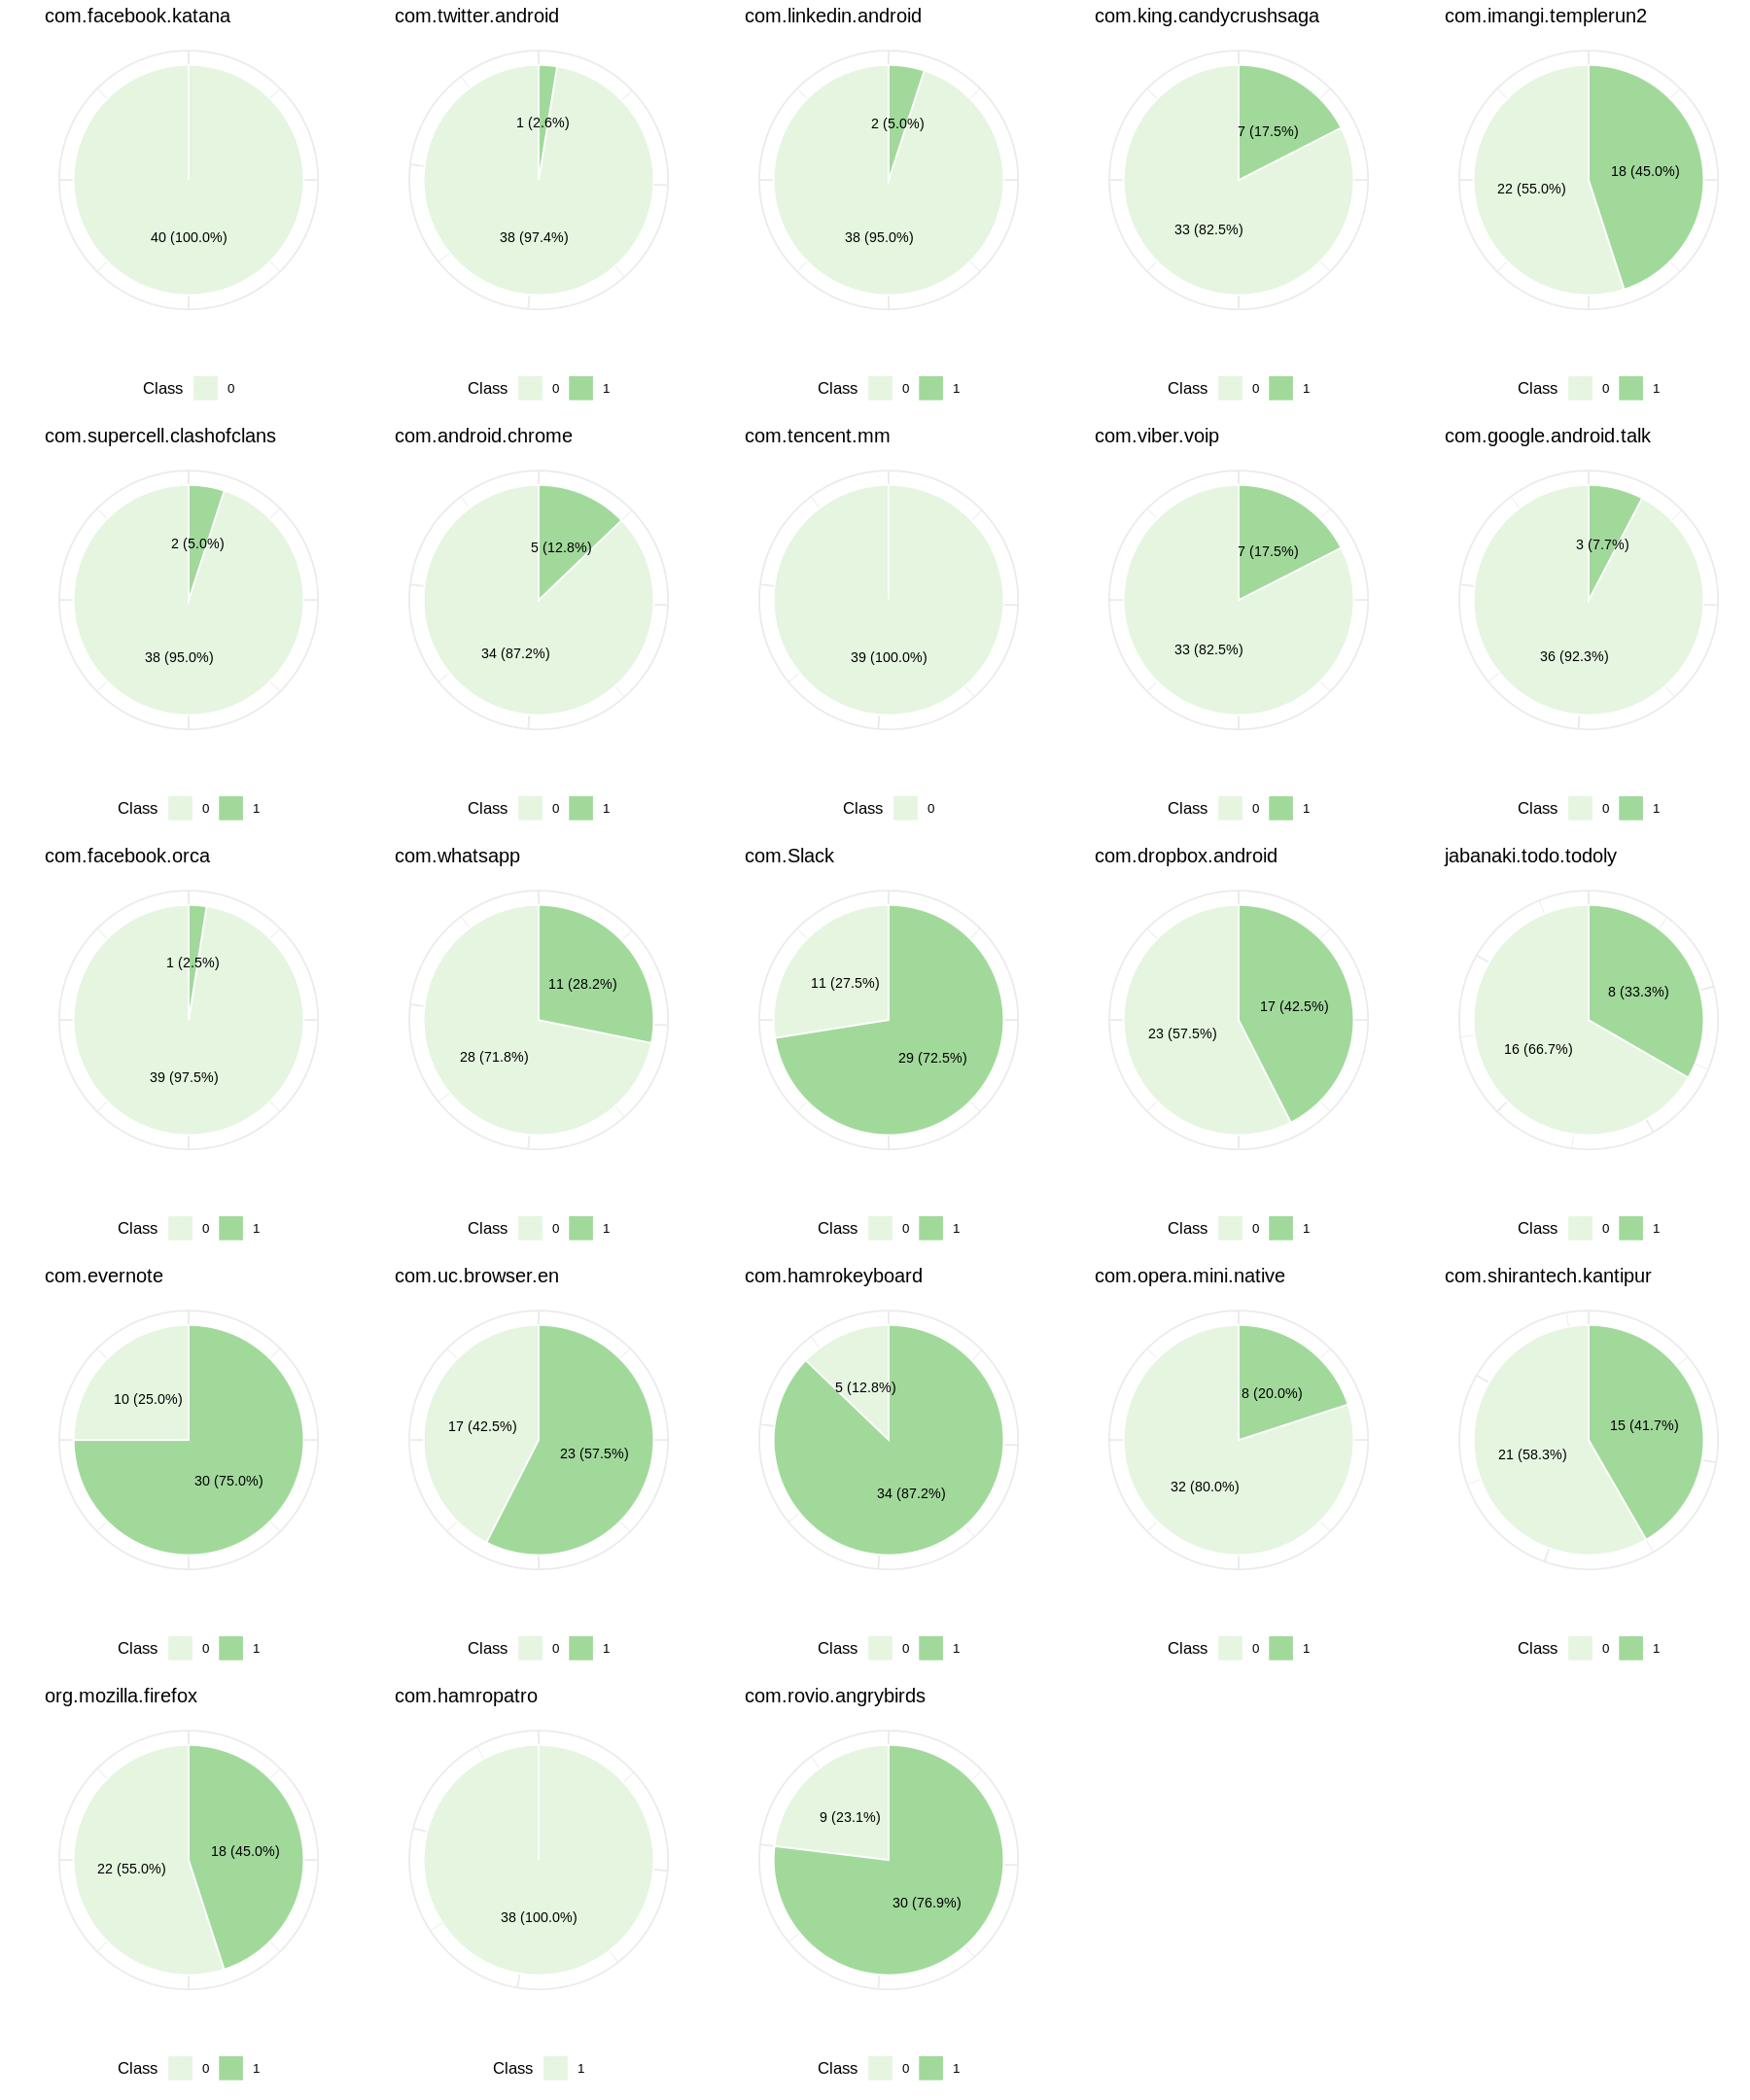

In [300]:
graficos_pie <- list()


for (class in unique(data$package_name)) {
  subset_data <- data[data$package_name == class, ]

  pie_chart <- ggplot(subset_data, aes(x = "", fill = as.factor(!!sym("polarity")))) +
    geom_bar(stat = "count", width = 1, color = "white") +
    coord_polar("y") +
    scale_fill_brewer(palette = "Greens") +
    labs(x = "", y = "", fill = "Class") +
    theme_minimal() +
    theme(legend.position = "bottom", text = element_text(size = 10), axis.text.x = element_blank()) +
    geom_text(
      stat = "count",
      aes(label = sprintf("%d (%.1f%%)", ..count.., ..count.. / sum(..count..) * 100)),
      position = position_stack(vjust = 0.5),
      size = 3
    ) +
    ggtitle(paste(class))

  graficos_pie[[length(graficos_pie) + 1]] <- pie_chart
}

options(repr.plot.width = 15, repr.plot.height = 18)
grid.arrange(grobs = graficos_pie, ncol = 5)

Pero además, es interesante observar esto en función del tipo de red social que estamos investigando. Si nos fijamos en los datos que tenemos, hay grandes diferencias entre la distribución de las clases en cada una de estas.

Por ejemplo, angrybirds, hamrokeyboard, evernote y slack, tienen más del 70% de las observaciones con reviews polarizadas, el caso más extremo es hamropatro que solo tiene datos de esta clase.

Por otro lado, facebook, tensen, twitter y linkedin tienen un porcentaje altísimo de sus datos con sentimientos neutros.

# Análisis de los datos

# Transformación de los Datos

In [301]:
# Crearemos una variable que usaremos al final del análisis
data <- data %>%
  mutate(App = case_when(
    grepl("com\\.facebook", package_name, ignore.case = TRUE) ~ "Redes Sociales",
    grepl("com\\.twitter", package_name, ignore.case = TRUE) ~ "Redes Sociales",
    grepl("com\\.linkedin", package_name, ignore.case = TRUE) ~ "Redes Sociales",
    grepl("com\\.king\\.candycrushsaga", package_name, ignore.case = TRUE) ~ "Juegos de Móvil",
    grepl("com\\.imangi\\.templerun2", package_name, ignore.case = TRUE) ~ "Juegos de Móvil",
    grepl("com\\.supercell\\.clashofclans", package_name, ignore.case = TRUE) ~ "Juegos de Móvil",
    grepl("com\\.android\\.chrome", package_name, ignore.case = TRUE) ~ "Navegadores",
    grepl("com\\.tencent\\.mm", package_name, ignore.case = TRUE) ~ "Comunicación",
    grepl("com\\.viber\\.voip", package_name, ignore.case = TRUE) ~ "Comunicación",
    grepl("com\\.google\\.android\\.talk", package_name, ignore.case = TRUE) ~ "Comunicación",
    grepl("com\\.whatsapp", package_name, ignore.case = TRUE) ~ "Comunicación",
    grepl("com\\.slack", package_name, ignore.case = TRUE) ~ "Comunicación",
    grepl("com\\.dropbox", package_name, ignore.case = TRUE) ~ "Productividad",
    grepl("jabanaki.todo.todoly", package_name, ignore.case = TRUE) ~ "Productividad",
    grepl("com\\.evernote", package_name, ignore.case = TRUE) ~ "Productividad",
    grepl("com\\.uc\\.browser", package_name, ignore.case = TRUE) ~ "Navegadores",
    grepl("com\\.hamrokeyboard", package_name, ignore.case = TRUE) ~ "Utilidades",
    grepl("com\\.opera\\.mini", package_name, ignore.case = TRUE) ~ "Navegadores",
    grepl("com\\.shirantech\\.kantipur", package_name, ignore.case = TRUE) ~ "Noticias",
    grepl("org\\.mozilla\\.firefox", package_name, ignore.case = TRUE) ~ "Navegadores",
    grepl("com\\.hamropatro", package_name, ignore.case = TRUE) ~ "Utilidades",
    grepl("com\\.rovio\\.angrybirds", package_name, ignore.case = TRUE) ~ "Juegos de Móvil",
    TRUE ~ "Otro"
  ))



A continuación, haremos una serie de transformaciones en los datos para poderlos tratar después y para poder crear nuestro modelo.

Primero crearemos un corpus de texto.

In [302]:
corpus = VCorpus(VectorSource(data$review),readerControl = list(language = 'en'))
print(corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 891


Luego transformaremos todas las letras mayúsculas que tenemos en nuestros textos en letras minúsculas.

(Después de haber investigado en el dataset no he encontrado visualmente comentarios con letras mayúsculas, pero es más seguro aplicar esta función y eliminarlas porque no tiene sentido revisar las 891 observaciones)

In [303]:
# Minúsculas
corpus_clean = tm_map(corpus, content_transformer(tolower))

A continuación, también hay que eliminar los números, palabras conectoras de lenguaje y a texto plano y signos de putuación. Después de estas transformaciones merece la pena visualizar como estan afectando a las reviews.

In [304]:
corpus_clean = tm_map(corpus_clean, removeNumbers)
corpus_clean = tm_map(corpus_clean, removeWords, stopwords("english"))
corpus_clean = tm_map(corpus_clean, removePunctuation)


# Visualización de la instancia antes y después de la transformación
print(lapply(corpus[[1]][1], as.character))
print(lapply(corpus_clean[[1]][1], as.character))
print(lapply(corpus[[2]][1], as.character))
print(lapply(corpus_clean[[2]][1], as.character))
print(lapply(corpus[[3]][1], as.character))
print(lapply(corpus_clean[[3]][1], as.character))
print(lapply(corpus[[4]][1], as.character))
print(lapply(corpus_clean[[4]][1], as.character))
print(lapply(corpus[[5]][1], as.character))
print(lapply(corpus_clean[[5]][1], as.character))




$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] " privacy  least put  option appear offline  mean   people like    big pressure   seen online like  need  response  every message  else   called seenzone     wanna   facebook   read   newsfeed  just wanna response  message  want  pls reconsidered  review  tried  turn  chat  still can see   online"

$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon 

Tengo que reconocer que no tenía pensado eliminar acentos y signos que no tienen las palabras en inglés porque pensava que no existían, pero siguiendo con el análisis, al ver la tabla que crearemos más adelante me aparecían palabras con acentos, palabras con letras repetidas 3 veces consecutivamente y iniciadas con dos letras iguales, así que también eliminaremos estas palabras.

In [305]:
# Siguiendo con el análisis me he dado cuenta que hay palabras con acentos y signos que no son del idioma ingles, eliminamos estas palabras
corpus_clean = tm_map(corpus_clean, content_transformer(function(x) iconv(x, "latin1", "ASCII", sub="")))
print(lapply(corpus[[891]][1], as.character))
print(lapply(corpus_clean[[891]][1], as.character))

$content
[1] " they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 đ\u009f\u008c\u009f because nothing's perfect"

$content
[1] "  everywhere  see angry birds everywhere    stop playing  game get   head devs    nothings perfect"



In [306]:
# Palabras con letras repetidas mas de dos veces o incluso con dos letras repetidas al inicio de la palabra
corpus_clean <- tm_map(corpus_clean, content_transformer(function(x) gsub("\\b(\\w)\\1(\\w*)\\b", "\\1\\2", x)))
corpus_clean <- tm_map(corpus_clean, content_transformer(function(x) gsub("(\\w)\\1{2,}", "\\1", x)))
print(lapply(corpus[[887]][1], as.character))
print(lapply(corpus_clean[[887]][1], as.character))

$content
[1] " loved it i loooooooooooooovvved it because it is incredible  awesome  and it's in go power and make a new clash of clans the same thing  butt better"

$content
[1] " loved   loved     incredible  awesome     go power  make  new clash  clans   thing  butt better"



Muchas de las modificaciones que hemos hecho nos generaran una cantidad de espacios demasiado alta así que también elimianremos los dobles espacios o los espacios generados al principio de frases.

In [307]:
# Dobles espacios y los sustituye por un solo espacio
corpus_clean = tm_map(corpus_clean, stripWhitespace)
# Eliminamos espacios al inicio y final de texto
corpus_clean = tm_map(corpus_clean, trimws)
# Visualización de la instancia antes y después de la transformación
print(lapply(corpus[[1]][1], as.character))
print(lapply(corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

[[1]]
[1] "privacy least put option appear offline mean people like big pressure seen online like need response every message else called seenzone wanna facebook read newsfeed just wanna response message want pls reconsidered review tried turn chat still can see online"



Y por último, unificaremos las palabras que nos dan la misma información es decir, que tienen la misma base semántica y que no nos aportaran nada por separado. De esta manera, también reducimos el número de palabaras.

In [308]:
# Unificamos términos con la misma información
corpus_clean = tm_map(corpus_clean, stemDocument, 'english')
print(lapply(corpus[[1]][1], as.character))
print(lapply(corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

[[1]]
[1] "privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin"



In [309]:
# Transforma a documentos de texto plano
corpus_clean = tm_map(corpus_clean, PlainTextDocument)

In [310]:
# Revisión de todas las transformaciones hechas
for (i in (1:10))
{
    print(paste0("subject number ", i))
    print(lapply(corpus[[i]][1], as.character))
    print(lapply(corpus_clean[[i]][1], as.character))
}

[1] "subject number 1"
$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] "privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin"

[1] "subject number 2"
$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens 

Aquí lo que he hecho es mostrar las diez primeras reviews que tenemos pre y post todas las transformaciones que hemos hecho.

Matizar que no he querido crear una función global de todas estas modificaciones hasta ahora para poder tener más claro lo que estaba haciendo paso a paso y entender mejor que hacía cada uno de los métodos aplicados.

In [311]:
# clean_corpus = function(corpus){
#               corpus_clean = tm_map(corpus, content_transformer(tolower))
#               corpus_clean = tm_map(corpus_clean, removeNumbers)
#               corpus_clean = tm_map(corpus_clean, removeWords, stopwords('english'))
#               corpus_clean = tm_map(corpus_clean, removeWords, stopwords())
#               corpus_clean = tm_map(corpus_clean, removePunctuation)
#               corpus_clean = tm_map(corpus_clean, stripWhitespace)
#               corpus_clean = tm_map(corpus_clean, removeWords, c('the'))
#               corpus_clean = tm_map(corpus_clean, stemDocument, 'english')
#               corpus_clean = tm_map(corpus_clean, PlainTextDocument)
#   return(corpus_clean)}

Una vez hemos transformado los datos, podemos usar el gráfico wordcloud para ver qué palabras están más repetidas en nuestras observaciones. Primero lo veremos de forma general y después filtraremos para ver la frecuencia de estas palabras en las dos clases de la variable polarity.

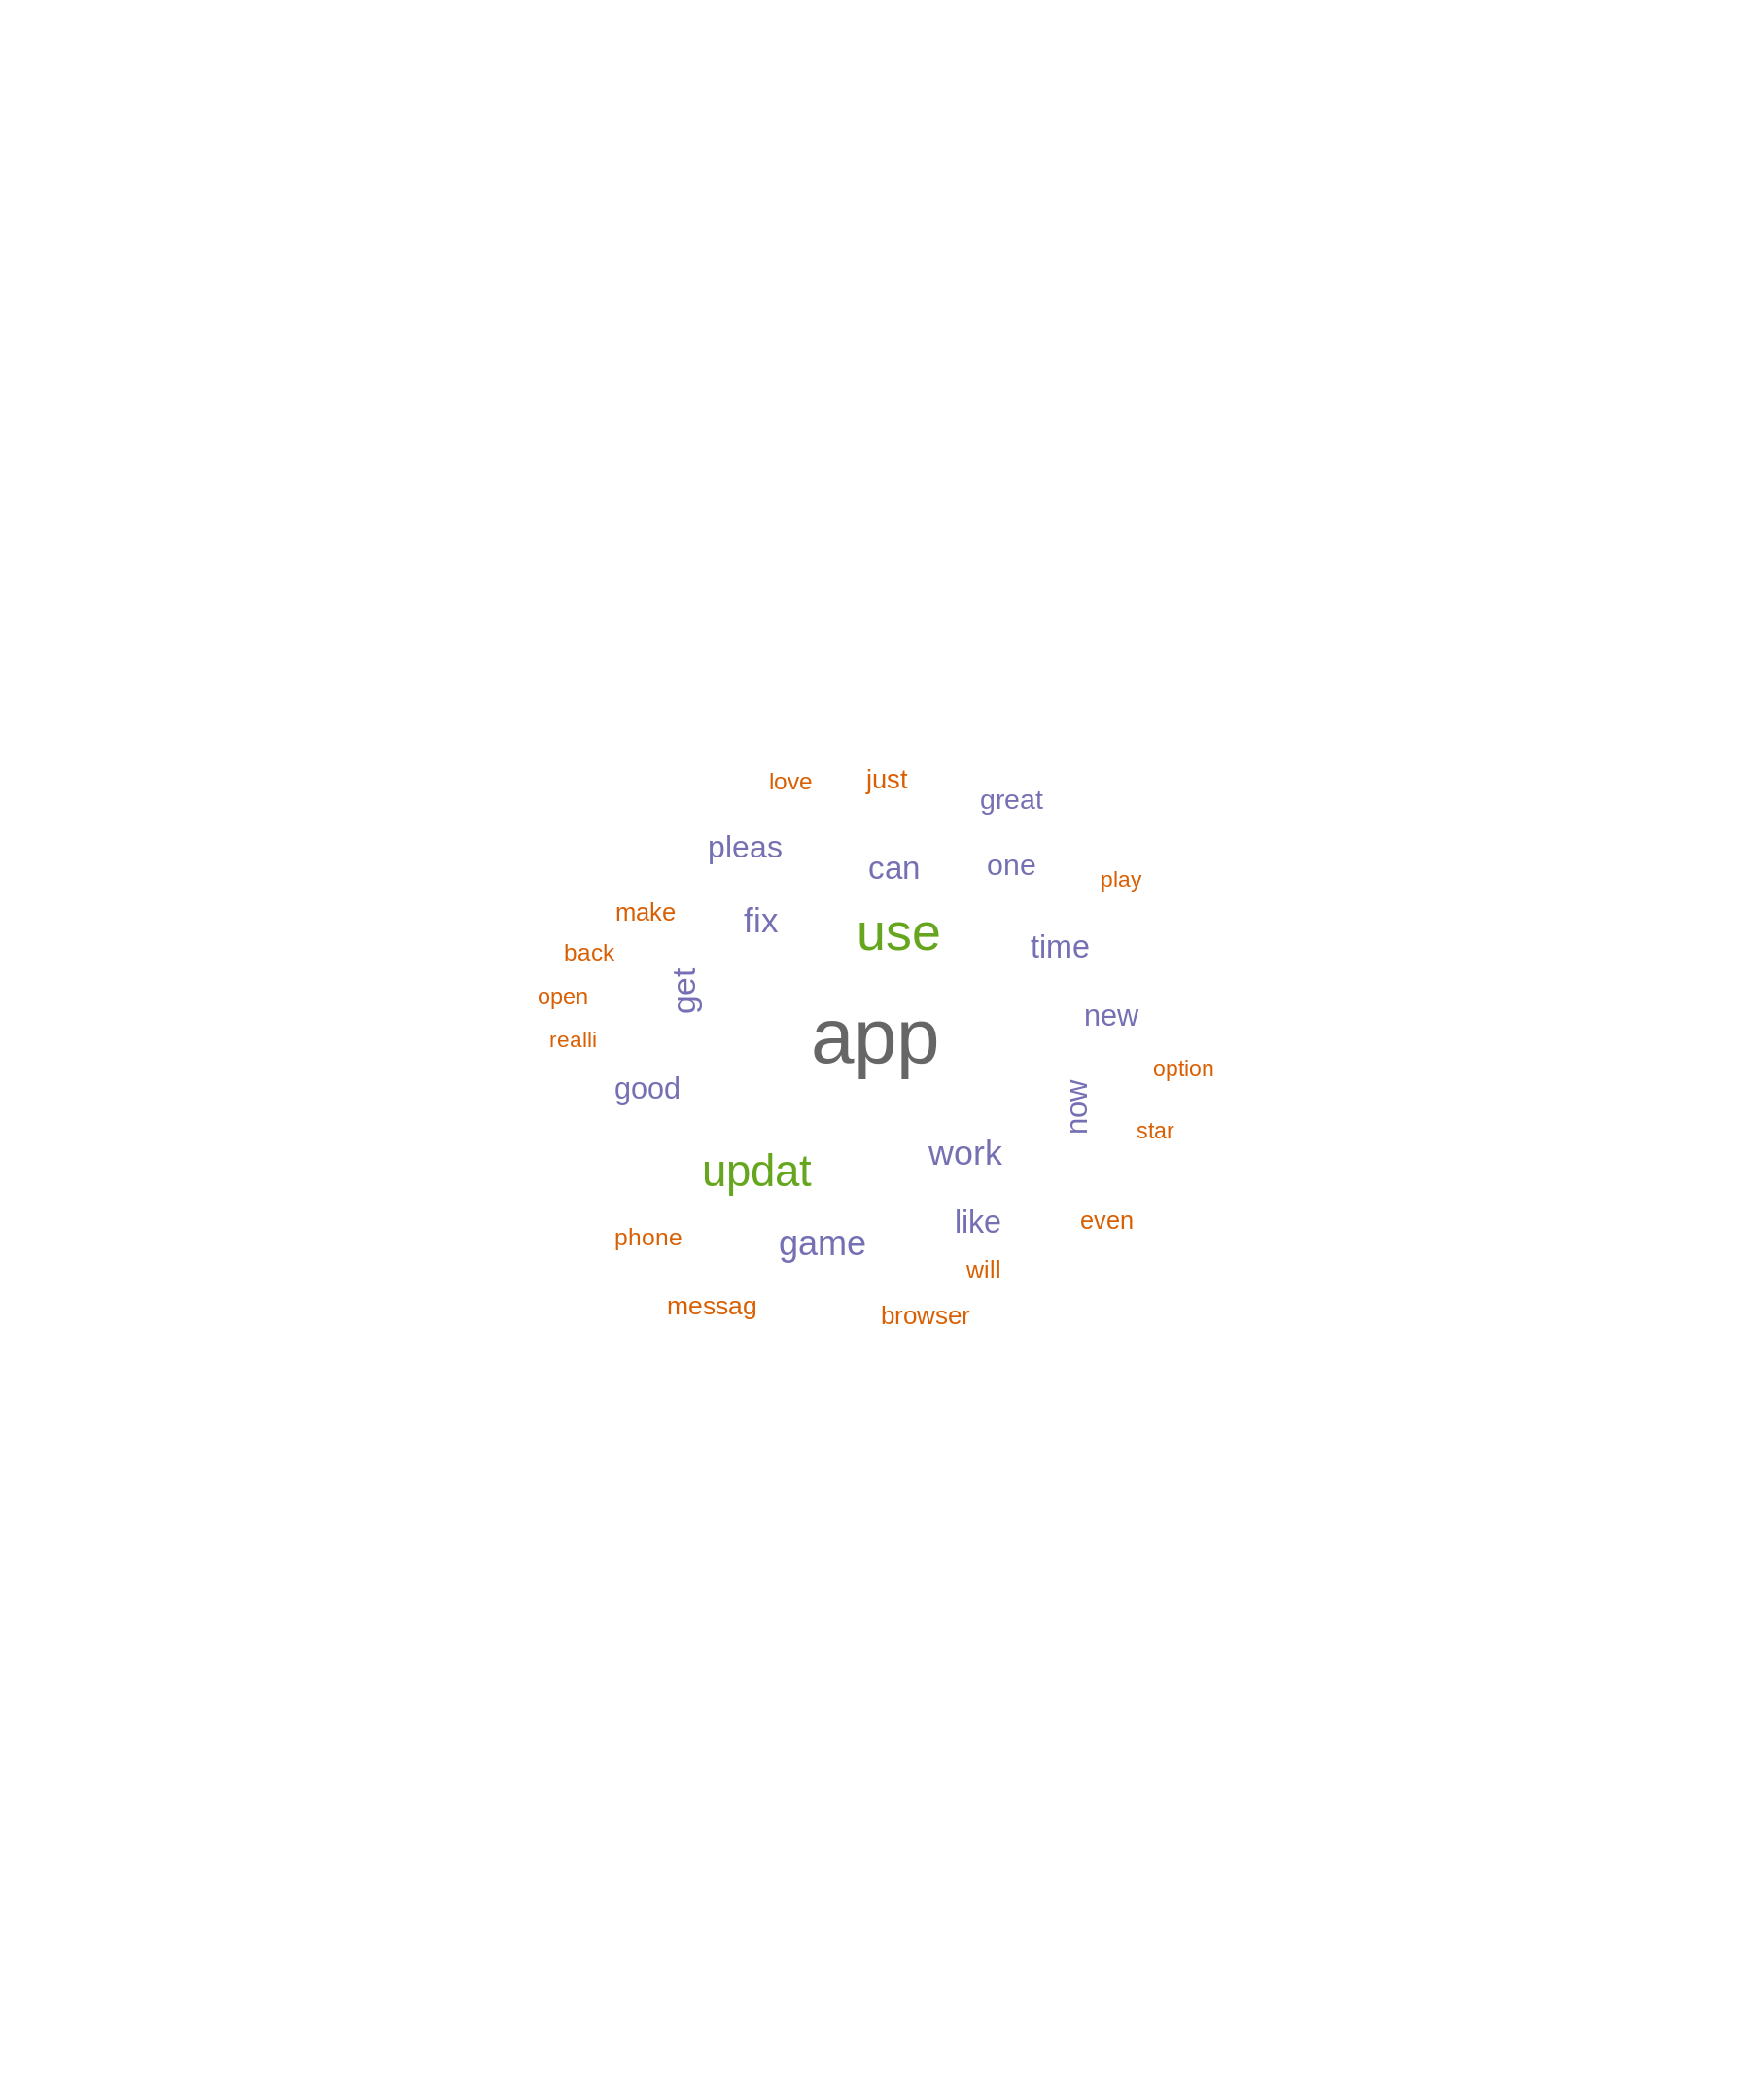

In [312]:
wordcloud(corpus_clean, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

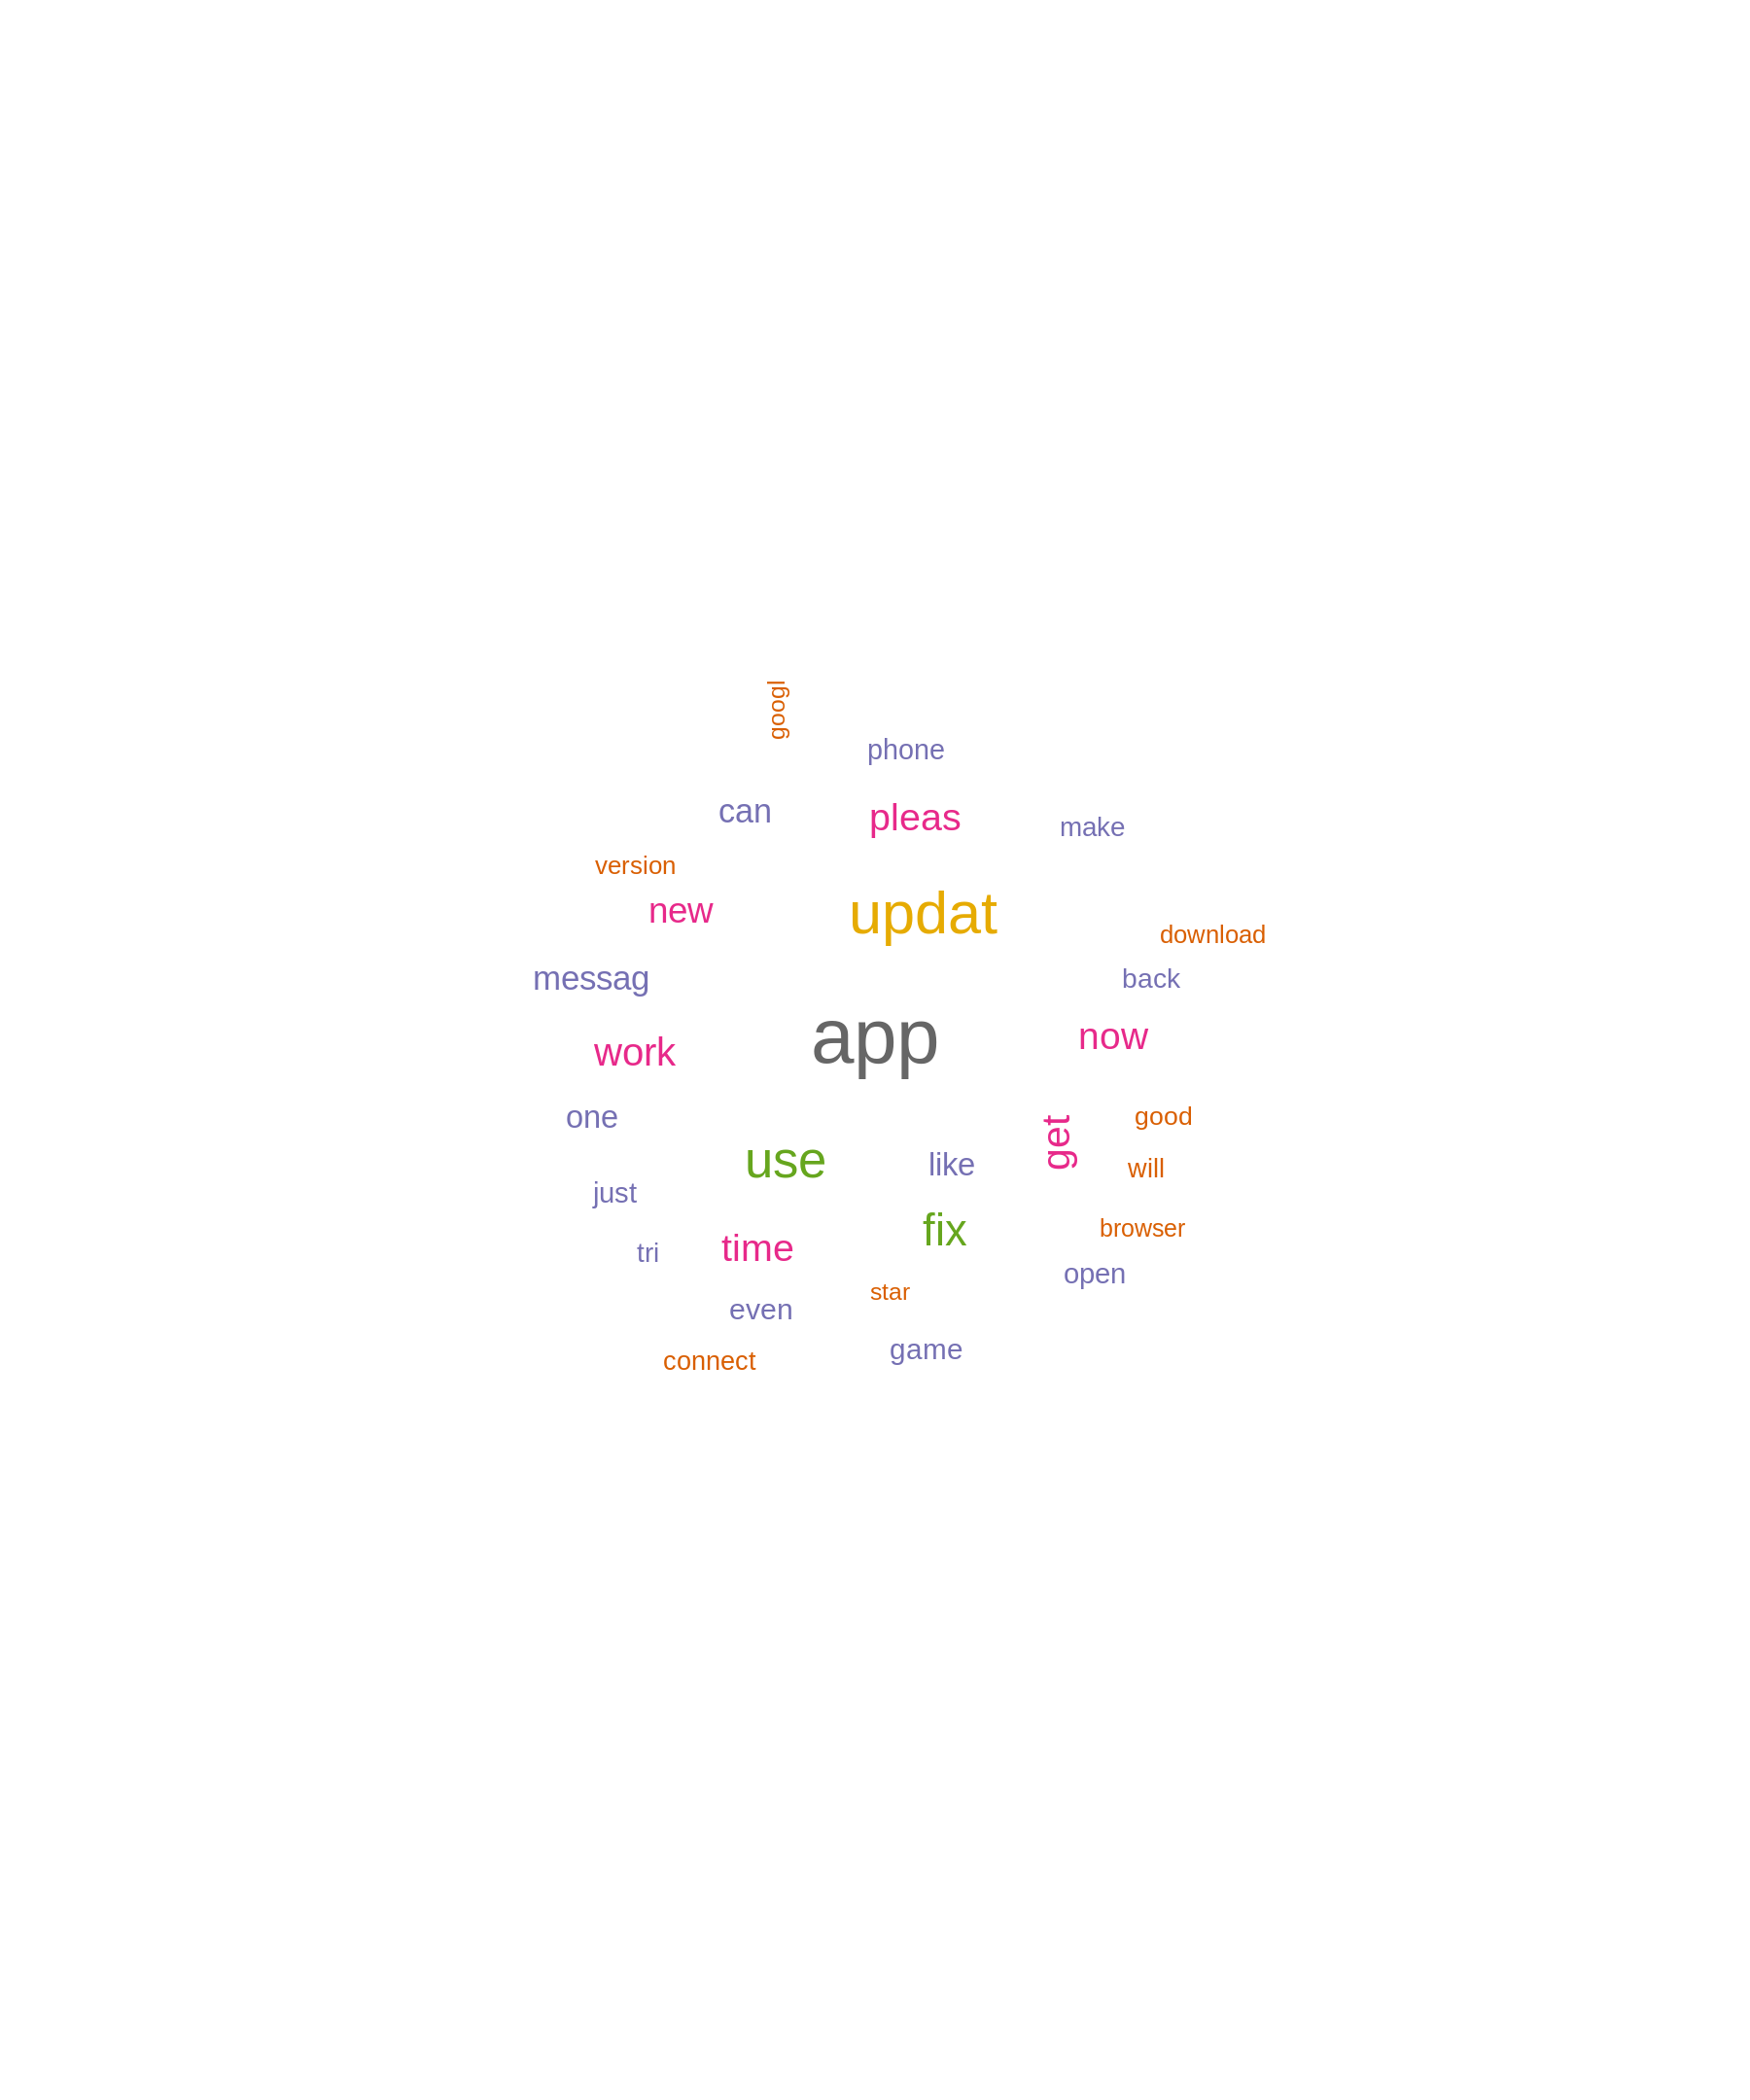

In [313]:
data_0 <- subset(corpus_clean, data$polarity == 0)
wordcloud(data_0, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

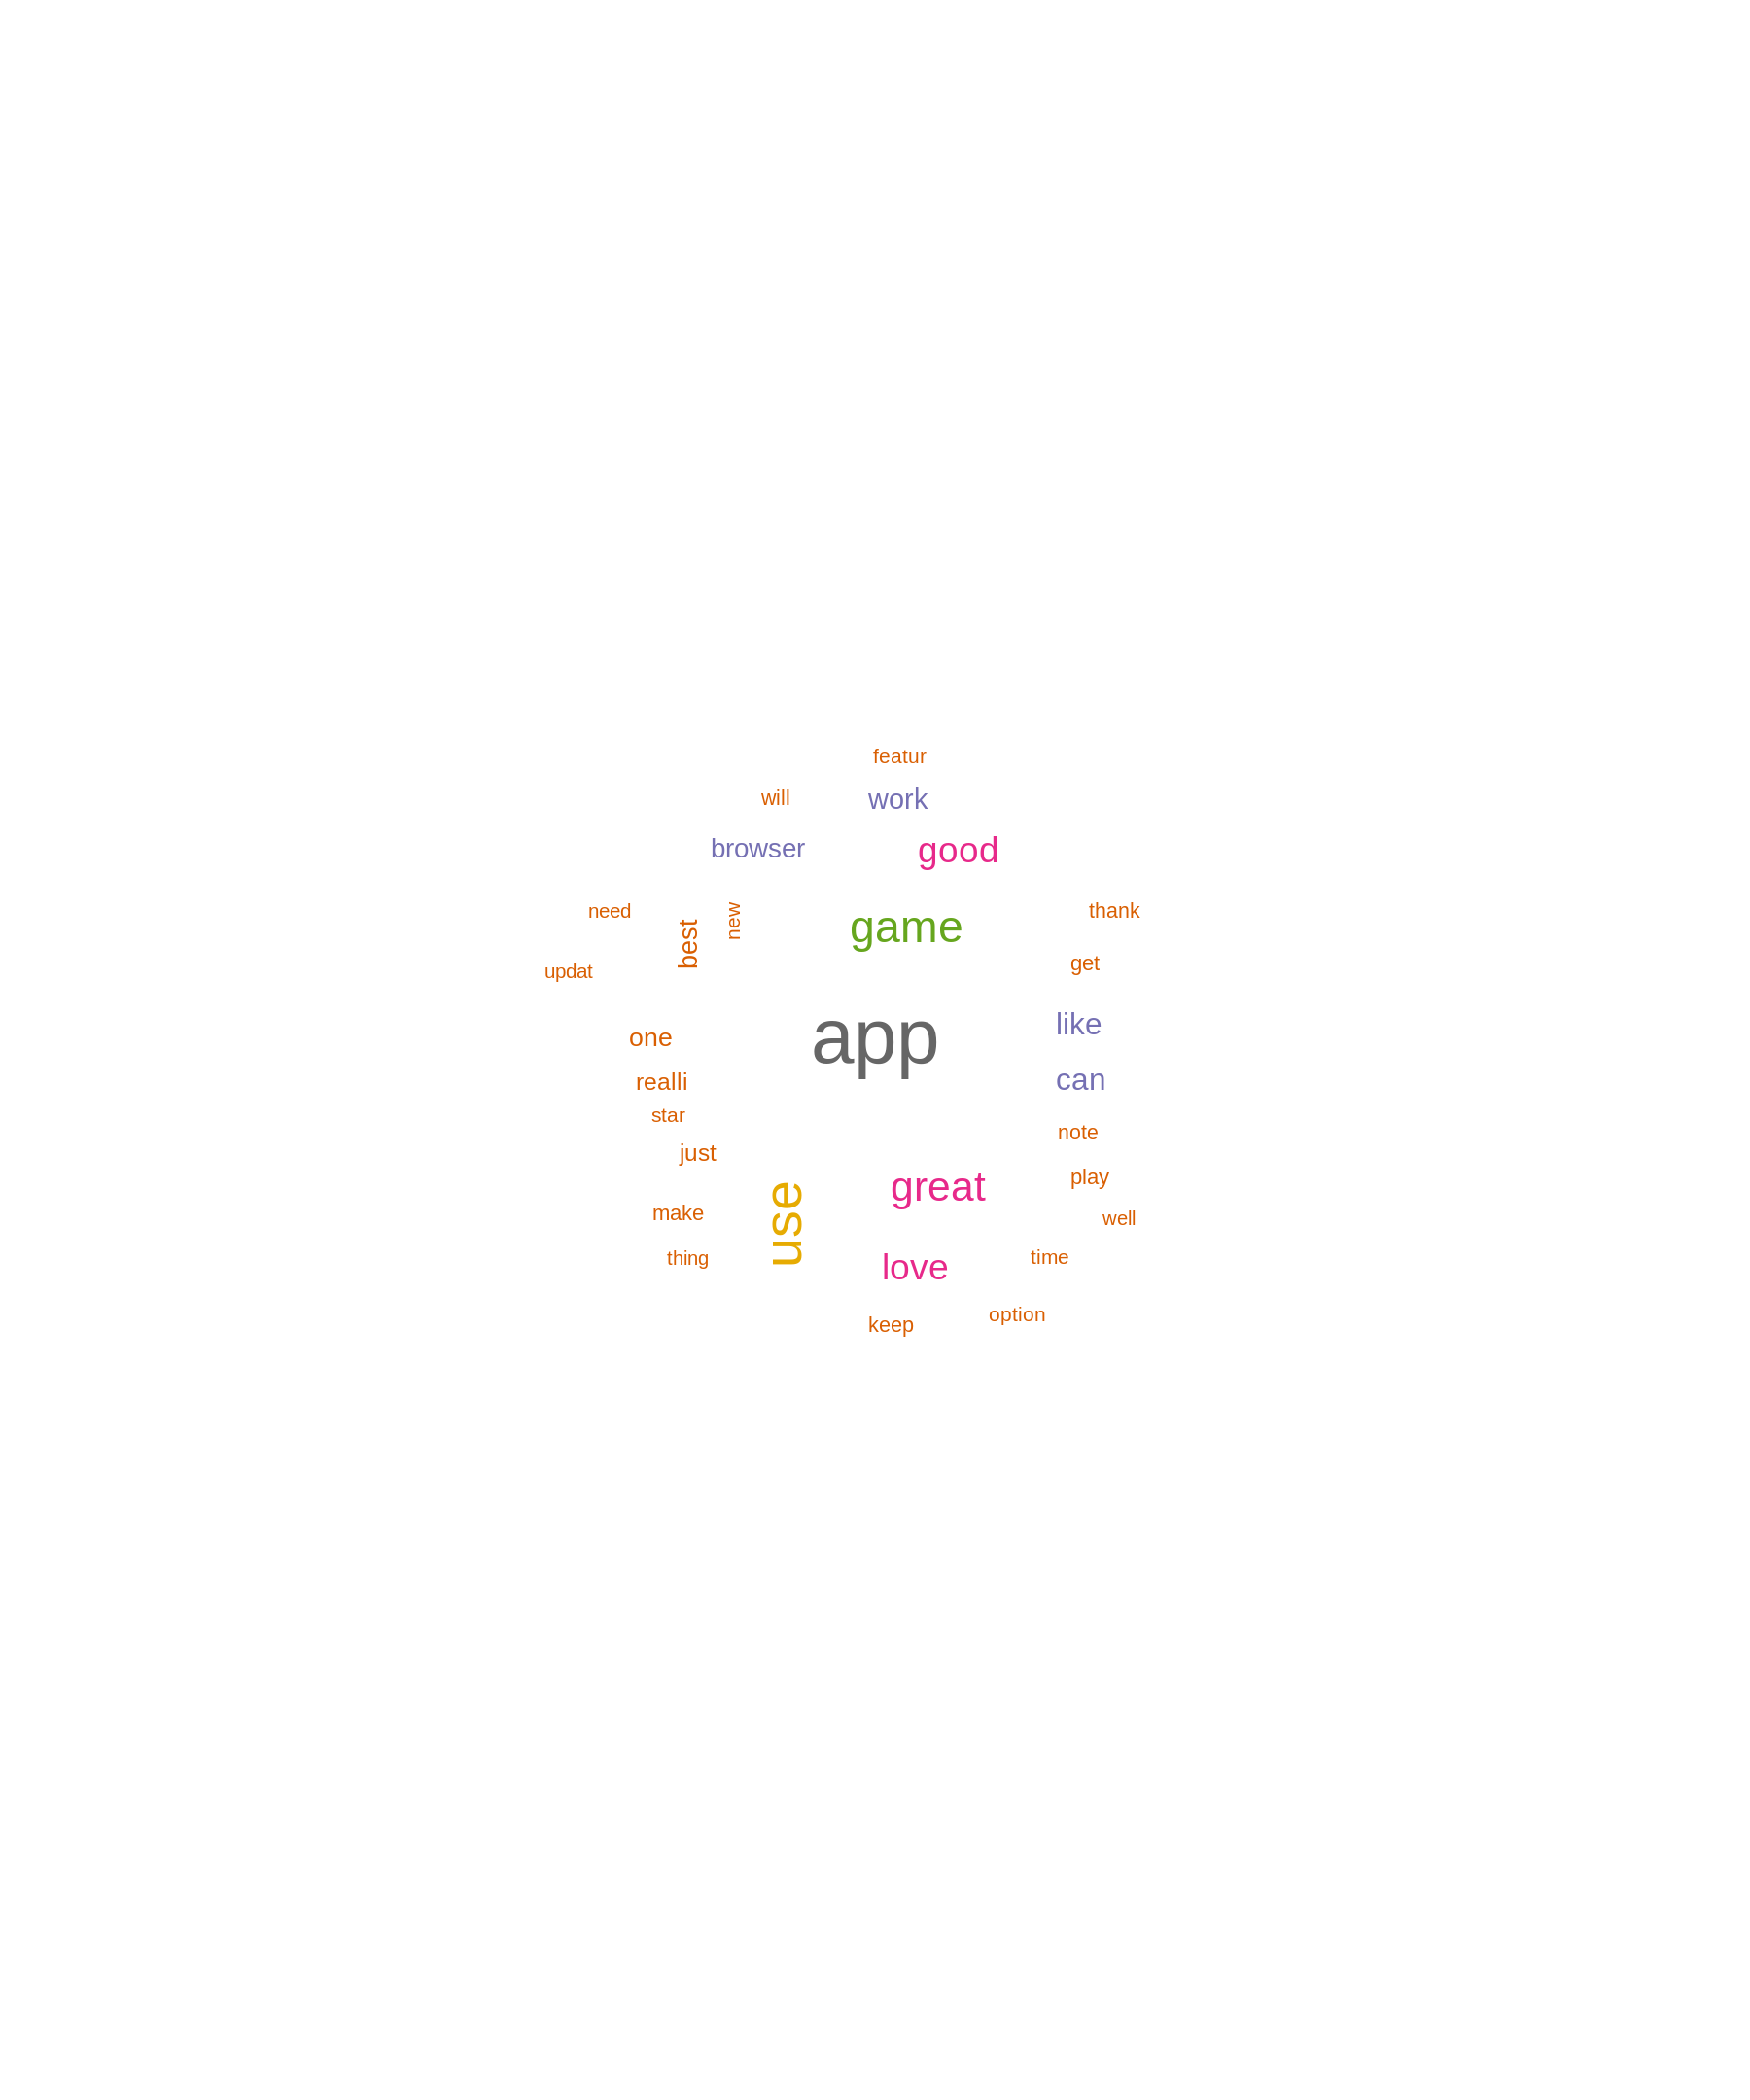

In [314]:
data_1 = subset(corpus_clean, data$polarity == 1)
wordcloud(data_1, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

# Modelo Naive Bayes

A partir de este momento podemos empezar a plantear nuestro modelo de clasificación. Para ello necesitaremos crear una matriz en la que contemos la cantidad de veces que aparece cada palabra en cada cadena (es decir en cada review).

**Train / Test Split:**

In [315]:
term_matriz = DocumentTermMatrix(corpus_clean)
term_matriz

<<DocumentTermMatrix (documents: 891, terms: 2730)>>
Non-/sparse entries: 16552/2415878
Sparsity           : 99%
Maximal term length: 20
Weighting          : term frequency (tf)

In [316]:
str(term_matriz)

List of 6
 $ i       : int [1:16552] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:16552] 124 248 348 355 396 735 786 831 1252 1314 ...
 $ v       : num [1:16552] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 891
 $ ncol    : int 2730
 $ dimnames:List of 2
  ..$ Docs : chr [1:891] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:2730] "abil" "abk" "abl" "absolut" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [317]:
as.matrix(term_matriz)

,abil,abk,abl,absolut,absurd,acc,acceces,accept,acces,access,⋯,yep,yes,yet,youtub,yrs,yup,zenfon,zero,zespol,zoom
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [318]:
#Establecemos las frecuencias de cada término sumando las columnas
frecuencia = colSums(as.matrix(term_matriz))
head(frecuencia)

abil     abk     abl absolut  absurd     acc 
     11       1      48       6       1       1

Ahora, al ordenar la tabla de frecuencia en orden descendente, nos confirmará la información que nos han dado los gráficos wordcloud.

In [319]:
# Creamos el nuevo data set y ordenamos por frecuencia
tabla_frecuencia = data.frame(term = names(frecuencia), freq = frecuencia)
tabla_frecuencia = tabla_frecuencia[order(-tabla_frecuencia$freq),]
head(tabla_frecuencia)


,term,freq
,<chr>,<dbl>
app,app,480
use,use,300
updat,updat,244
game,game,179
work,work,177
fix,fix,171


A partir de aquí, ya podemos dividir los datos entre un set de entrenamiento y otro de testeo, que son los que nos ayudaran con el modelo. Haremos una partición del 80/20.

Al hacer esta partición, también hemos querido ver si la proporción entre clases seguía siendo la misma que al inicio y entre los grupos.

In [320]:
set.seed(79)

inTrain <- createDataPartition(y = data$polarity
                                  , p = .80
                                  , list = FALSE
                                  , times = 1)

data.train <- data[inTrain,]
data.test <- data[-inTrain,]
# Revisamos el split
str(data.train)
str(data.test)

print("Training")
round(prop.table(table(data.train$polarity))*100, 2)
print("Test")
round(prop.table(table(data.test$polarity))*100, 2)

'data.frame':	714 obs. of  4 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ App         : chr  "Redes Sociales" "Redes Sociales" "Redes Sociales" "Redes Sociales" ...
'data.frame':	177 obs. of  4 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.twitter.


    0     1 
65.55 34.45 

[1] "Test"



    0     1 
65.54 34.46 

In [321]:
# También dividimos la matriz
corpus.train = corpus_clean[inTrain]
corpus.test  = corpus_clean[-inTrain]

matriz.train = term_matriz[inTrain, ]
matriz.test  = term_matriz[-inTrain, ]

Una vez tenemos los datos bien divididos, hacemos un filtrado entre ellos, y seleccionamos solo las instancias que aparecen más de 2 veces en nuestra matriz, seleccionandolas para seguir con el modelo y eliminando aquellas palabras que tengan una frecuencia menor a 3.

In [322]:
#Encontramos todas las palabras que se repiten más de 2 veces
masdedos = findFreqTerms(matriz.train, 2)
masdedos

[1] "abil"          "abl"           "absolut"       "access"       
   [5] "accid"         "account"       "accur"         "achiev"       
   [9] "across"        "act"           "action"        "activ"        
  [13] "actual"        "add"           "addict"        "addit"        
  [17] "address"       "adjust"        "advantag"      "advert"       
  [21] "advertis"      "age"           "ago"           "agre"         
  [25] "aint"          "akash"         "album"         "alert"        
  [29] "allow"         "almost"        "along"         "alot"         
  [33] "alreadi"       "also"          "altern"        "although"     
  [37] "alway"         "amaz"          "among"         "amount"       
  [41] "android"       "angri"         "anim"          "annapurna"    
  [45] "annoy"         "anoth"         "anoy"          "answer"       
  [49] "anybodi"       "anymor"        "anyon"         "anyth"        
  [53] "app"           "appeal"        "appear"        "appl"         
  [57] "appli"         "applic"        "appreci"       "around"       
  [61] "arrang"        "artifact"      "asap"          "ask"          
  [65] "aspect"        "asus"          "atleast"       "attack"       
  [69] "attract"       "authent"       "auto"          "automat"      
  [73] "avail"         "averag"        "away"          "awesom"       
  [77] "awhil"         "awsom"         "back"          "background"   
  [81] "backup"        "bad"           "bait"          "balanc"       
  [85] "balloon"       "bar"           "base"          "basic"        
  [89] "batteri"       "beauti"        "becom"         "beep"         
  [93] "begin"         "behav"         "behind"        "belong"       
  [97] "besid"         "best"          "beta"          "better"       
 [101] "big"           "bigger"        "bird"          "birthday"     
 [105] "bit"           "black"         "blank"         "block"        
 [109] "bolt"          "bomb"          "bonus"         "book"         
 [113] "bookmark"      "boost"         "booster"       "bore"         
 [117] "bottom"        "bought"        "box"           "break"        
 [121] "brilliant"     "bring"         "broke"         "broken"       
 [125] "brother"       "brows"         "browser"       "bubbl"        
 [129] "bug"           "buggi"         "build"         "built"        
 [133] "bullshit"      "bunch"         "burn"          "busi"         
 [137] "butt"          "button"        "buy"           "cach"         
 [141] "calendar"      "call"          "came"          "camera"       
 [145] "can"           "cancel"        "candi"         "cant"         
 [149] "cap"           "capit"         "caption"       "card"         
 [153] "care"          "carousel"      "case"          "cast"         
 [157] "casual"        "caus"          "cell"          "cellular"     
 [161] "certain"       "challeng"      "chanc"         "chang"        
 [165] "channel"       "charact"       "chat"          "chathead"     
 [169] "cheap"         "check"         "chines"        "choic"        
 [173] "choos"         "christma"      "chrome"        "chromecast"   
 [177] "clan"          "clash"         "classic"       "cleaner"      
 [181] "clear"         "click"         "client"        "clip"         
 [185] "clog"          "close"         "cloud"         "clutter"      
 [189] "coc"           "code"          "collect"       "color"        
 [193] "colour"        "combin"        "come"          "comment"      
 [197] "commerci"      "communic"      "compani"       "compar"       
 [201] "compat"        "compet"        "competit"      "complain"     
 [205] "complaint"     "complet"       "complic"       "comput"       
 [209] "con"           "concern"       "confus"        "connect"      
 [213] "consid"        "constant"      "contact"       "content"      
 [217] "continu"       "control"       "conveni"       "convers"      
 [221] "cool"          "coordin"       "copi"          "core"         
 [225] "correct"       "cos

In [323]:
masdedos = findFreqTerms(matriz.train, 2)
reduced_matriz.train = DocumentTermMatrix(corpus.train, list(dictionary=masdedos))
reduced_matriz.test =  DocumentTermMatrix(corpus.test, list(dictionary=masdedos))

#Revisamos cuantas columnas reducimos
ncol(matriz.train)
ncol(reduced_matriz.train)
ncol(matriz.test)
ncol(reduced_matriz.test)

[1] 2730

[1] 1234

[1] 2730

[1] 1234

Podemos observar en el output de este código la cantidad de datos iniciales que teníamos antes de hacer este filtrado. Hemos eliminado 1496 variables.

A partir de aquí necesitamos hacer una transformación de esta matriz, necesitamos una matriz binaria que nos dé un valor igual a 0 en el caso de que una palabra aparezca 0 veces en una observación y un valor igual a 1 en caso de que esta palabra aparezca en una observación. La matriz anterior nos daba cuantas veces aparecía, ahora, solo si aparece o no.

Después de esto ya podremos crear el modelo y analizar sus resultados

In [324]:
convert_counts = function(x) {
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0, 1), labels=c("0", "1"))
  return (x)
}

reduced_matriz.train = apply(reduced_matriz.train, MARGIN=2, convert_counts)
reduced_matriz.test  = apply(reduced_matriz.test, MARGIN=2, convert_counts)

In [325]:
# Modelo
modelo = naiveBayes(reduced_matriz.train, data.train$polarity)

#Predicciones
predicciones = predict(modelo, reduced_matriz.test)

In [326]:
# Matriz de Confusión
confusionMatrix(predicciones, data.test$polarity)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 93 16
         1 23 45
                                          
               Accuracy : 0.7797          
                 95% CI : (0.7113, 0.8384)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 0.0002198       
                                          
                  Kappa : 0.5251          
                                          
 Mcnemar's Test P-Value : 0.3366684       
                                          
            Sensitivity : 0.8017          
            Specificity : 0.7377          
         Pos Pred Value : 0.8532          
         Neg Pred Value : 0.6618          
             Prevalence : 0.6554          
         Detection Rate : 0.5254          
   Detection Prevalence : 0.6158          
      Balanced Accuracy : 0.7697          
                                          
       'Positive' Class : 0               
                                    

Los resultados nos dice que el modelo que hemos creado clasifica casi un 78% de las observaciones correctamente.

Podemos observar además que:
- El modelo clasifica correctamente un 78% de las observaciones que realmente tienen sentimientos neutros
- El modelo clásica correctamente un 75% de las observaciones que realmente tienen sentimientos polarizados
- El 85% de las predicciones del modelo de las observaciones neutras, son realmente neutras
- El 66% de las predicciones del modelo de las polarizadas, son realmente polarizadas

Vamos a intentar analizar lo que está pasando observando los errores que hace nuestro modelo, es interesante saber sobre todo porque se reduce tanto la precisión en el caso de las observaciones polarizadas porque creo que es objetivo más interesante:

En los últimos años, cada vez se habla más de la polarización en las redes y creo que puede ser muy interesante crear un modelo que clasifique con mucha precisión los comentarios polarizados que reciba como inputs.

Un pequeño apunte interesante antes de seguir analizando los resultados es que puede ser que la precisión del modelo en la clase 0 sea superior a la de la otra clase, ya que también la cantidad de datos de esta clase lo es. De esta manera, le estamos dando más información.

In [327]:
errores_class0 = data.test[(predicciones != data.test$polarity) & (data.test$polarity == "0"),]
errores_class0

,package_name,review,polarity,App
,<chr>,<chr>,<fct>,<chr>
75,com.twitter.android,"so much room for improvement... the twitter app has been around for several years and yet it still hasn't lived up to its full potential. here's an example: how don't we have the capability to save gifs and videos? not only that, but it'd be cool if we can customize and have different layouts and appearances. simple updates like those would make this app so much better, not lame ones like changing favorites to likes. hopefully these ideas can be considered for 2016.",0,Redes Sociales
138,com.king.candycrushsaga,i love playing candy crush but... why when u go to another episode you have to wait for along time for example i was in level 50 and i passed it and had to wait 75 hours for episode 3 the game is good and very addictive but i don't like the waiting for the episodes đł by the way good đwork,0,Juegos de Móvil
160,com.imangi.templerun2,book and their use as a great christmas navarro was gonna get a lot of different names for christmas is a screamer and i can't remember if my sis and baking and making everything so perfect for me to believe in things and i'll return to go over in a few minutes ago and i have a great day at home soon and their little room in the kids to school with your questions,0,Juegos de Móvil
175,com.imangi.templerun2,the new theme is not compatible with my device :( (samsung galaxy j1) make it compatible please. i really love this game.,0,Juegos de Móvil
187,com.imangi.templerun2,no upgrades to the game till yet...the developers have no idea how to do upgrades.... most of the people have stopped playing it because it got old and there is no fun playing it now...,0,Juegos de Móvil
262,com.android.chrome,bookmark folders what happened to the bookmark folders? everything was organized like it was on my computer and now they are just on a list. kind of hard to find things when they are like that,0,Navegadores
295,com.tencent.mm,i met my life here my girlfriend heads off the app. thank you wechat & the entire team .,0,Comunicación
314,com.tencent.mm,"awesome voice quality the best in class audio. plz include group voice calls, only video calls have it. option to add another person between the call should be provided.",0,Comunicación
324,com.viber.voip,mark i found viber to be extremely efficient way to communicate with my loved one. i have skype as well but it's not as good as viber.,0,Comunicación


Es sorprendente observar como en la mayoría de estos errores (el modelo predice polarización, pese a no existir) lo que pasa es que hay palabras muy sentimentales. 'Love','hate', por ejemplo, pero de forma contrapuesta.

Se puede intuir un poco que el modelo quiere creer que estos comentarios están polarizados por el uso de sentimientos fuertes en ellos, pese a que en muchos casos son comentarios diciendo 'me gustaba mucho, ahora se puede mejorar mucho'. El detectar me gustaba mucho o se puede mejorar mucho, piensa que está polarizado sin entender bien el contexto total del comentario.

In [328]:
errores_class1 = data.test[(predicciones != data.test$polarity) & (data.test$polarity == "1"),]
errores_class1

,package_name,review,polarity,App
,<chr>,<chr>,<fct>,<chr>
186,com.imangi.templerun2,old is gold i used to play this game a lot when iwas nearly in 4 std but even after 4 years when i'm in 8 the this game still continues to be my fav . i really never get tired of playing this as u know now that this is my fav.,1,Juegos de Móvil
224,com.supercell.clashofclans,"know how to get the account back. you have to delete clash of clans,then you download it again, then you look on the upper left corner of the screen, then you see already have a village?'' then you press it,then you will have your village.",1,Juegos de Móvil
351,com.viber.voip,viber s.a.r.l. this app helps me to stay in contact while also having video options and picture options. really nice app and pretty stable running. just a few video and audio issues as well as video and call drops which can be annoying. sometimes the app is unstable but is mostly attributed to network issues rather than the app itself. i recommend this app.,1,Comunicación
440,com.whatsapp,whatsapp i use this app now that blackberry messenger has basically gone away. my friends & family live all over the world. this really helps keep us in touch!,1,Comunicación
447,com.whatsapp,"add : search people if you don't have the persons number , but they have whatsapp you should be able to search their name and then , add them or something . then it would be 5 stars ...",1,Comunicación
480,com.Slack,"makes everything so easy slack is easy to use and has all the right (ridiculously well polished) features. and it's backed by a genuine, caring and honest team. it almost seems like they want you to be happy even *after* you give them your money! crazy!",1,Comunicación
481,com.Slack,"good app for free this is a great collabo app, especially since it's free. i asked for 2 things and slack delivered: 1. proper gif viewing 2. ability to change profile pic from app. functionality complete!",1,Comunicación
603,com.evernote,"the most useful app in the marketplace if used properly . . . if you've ever thought how nice it would be to get rid of all the paper and clutter in your life and yet still have it available anytime/all the time using powerful searches, then evernote is for you. take a picture of anything and store it; scan paper using your smart phone or scanner and store it all in a note; forward emails directly into evernote; drag and drop computer files, create a note using your finger in handwriting or text mode, clip pages or parts of web pages, use voice . . .",1,Productividad
608,com.evernote,"great and solid app. love the widget. most important feature about this app in my opinion. couple things: number and bullet point lists don't show as formatted when seen on the widget. please fix. also, i'd personally like it if emojis were implemented. i'd also like it if we had more control over the appearance of the widget (opacity, font size/color, background color).",1,Productividad


Aquí sucede algo parecido, es como que le cuesta entender el contexto. Observemos este comentario:

"*classic browsing at it's best!!! i've recently upgraded to android from a bb9900. i've been using opera on my bb for years. was actually disappointed with android at first. until i installed mini!! webpages like facebook are back to the way they should be. please don't change a thing. using mini for facebook is the best! where can i donate?*"

Claramente es muy positivo, le encanta el nuevo buscador, pero es probable que al leer también palabras como disappointed y ver "mixed feelings" igual piensa que es un comentario neutro.

# Optimización del Modelo con Laplace Smothing

In [329]:
for (i in (1:10))
 {
    print(paste0("Laplace factor of ", as.character((i-1)/4)))

    modelo2 = naiveBayes(reduced_matriz.train, data.train$polarity, laplace = (i-1)/4)

    predicciones2 = predict(modelo2, reduced_matriz.test)

    print(confusionMatrix(predicciones2, data.test$polarity))
 }

[1] "Laplace factor of 0"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 93 16
         1 23 45
                                          
               Accuracy : 0.7797          
                 95% CI : (0.7113, 0.8384)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 0.0002198       
                                          
                  Kappa : 0.5251          
                                          
 Mcnemar's Test P-Value : 0.3366684       
                                          
            Sensitivity : 0.8017          
            Specificity : 0.7377          
         Pos Pred Value : 0.8532          
         Neg Pred Value : 0.6618          
             Prevalence : 0.6554          
         Detection Rate : 0.5254          
   Detection Prevalence : 0.6158          
      Balanced Accuracy : 0.7697          
                                          
       'Positive' Class : 0               
          

Es interesante de ver que, conforme aumenta el valor de Laplace, mejora la predicción de nuestra variable objetivo. Por ejemplo en el caso de Laplace = 1,aunque pierde calidad respecto los que tienen un factor más bajo, nuestro objetivo incrementa muchísimo en precisión. De hecho, se puede decir que el modelo con factor 1 acierta en un 98% de los casos de comentarios polarizados, es decir, que clasifica con una precisión del 98% los casos están polarizados y solo se equivoca en una observación.

Aunque es muy tentador quedarse con el modelo que mejor predice nuestra variable objetivo, hay que ser cuidadosos y entender que puede ser un poco mejor decidir balancearlo todo, coger un modelo que mantenga una buena accuracy general y que tenga precisión en nuestro objetivo suficientemente buena.

Esto último merece la pena mencionarlo porque por ejemplo, podemos ver que los últimos modelos propuestos aqui son perfectos a nivel de predicción de la segunda clase pero dejan mucho que desear con la clase 0, es por eso que creo que merece la pena quedarse con modelos un poco mejores.

In [330]:
# Modelo con Laplace = 1
modelo_Laplace_1 = naiveBayes(reduced_matriz.train, data.train$polarity, laplace = 1)

predicciones3 = predict(modelo_Laplace_1, reduced_matriz.test)

print(confusionMatrix(predicciones3, data.test$polarity))

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 59  1
         1 57 60
                                          
               Accuracy : 0.6723          
                 95% CI : (0.5979, 0.7409)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 0.3489          
                                          
                  Kappa : 0.4042          
                                          
 Mcnemar's Test P-Value : 5.128e-13       
                                          
            Sensitivity : 0.5086          
            Specificity : 0.9836          
         Pos Pred Value : 0.9833          
         Neg Pred Value : 0.5128          
             Prevalence : 0.6554          
         Detection Rate : 0.3333          
   Detection Prevalence : 0.3390          
      Balanced Accuracy : 0.7461          
                                          
       'Positive' Class : 0               
                                    

In [331]:
errores1_laplace1 = data.test[(predicciones3 != data.test$polarity) & (data.test$polarity == "1"),]
errores1_laplace1

,package_name,review,polarity,App
,<chr>,<chr>,<fct>,<chr>
224,com.supercell.clashofclans,"know how to get the account back. you have to delete clash of clans,then you download it again, then you look on the upper left corner of the screen, then you see already have a village?'' then you press it,then you will have your village.",1,Juegos de Móvil


Aquí podemos observar el único error en las predicciones de la clase 1 que comete este error.

Si analizamos el texto, realmente se puede llegar a entender porque lo comete ya que el texto es bastante ambiguo, no nos da demasiada información y de hecho, si yo tuviera que decidir si es un texto polarizado (1) o no polarizado (0) probablemente le daría un 0.

# Variable Nueva: App

Por último, puede ser interesante probar de crear un modelo que tenga en cuenta la que hemos creado nosotros que se llama 'app'. Esta variable es senzillamente una clasificación de la variable package name, que nos da información sobre el tipo de plataforma sobre las que se han publicado las 'reviews'.

Al inicio hemos visto que esta información tenía desbalances muy grandes, ya que teníamos aplicaciones con prácticamente solo reviews de un tipo de clase y otras con la opuesta, así que vamos a ver cuáles son los resultados. Pero he creído que igual era un pelin más interesante crear el modelo con los tipos de aplicaciones conjuntados.

Para hacer esto vamos a tener que crear una matriz binaria en la que cada columna sea una aplicación distinta y cada observación sea una fila, de esta manera obtendremos una matriz en la que tendremos las observaciones, por un lado, y un 1 en la columna (observación) en la que la review esté publicada.

Antes de seguir, merece la pena analizar un poco la distribución en cada clase de esta nueva variable.

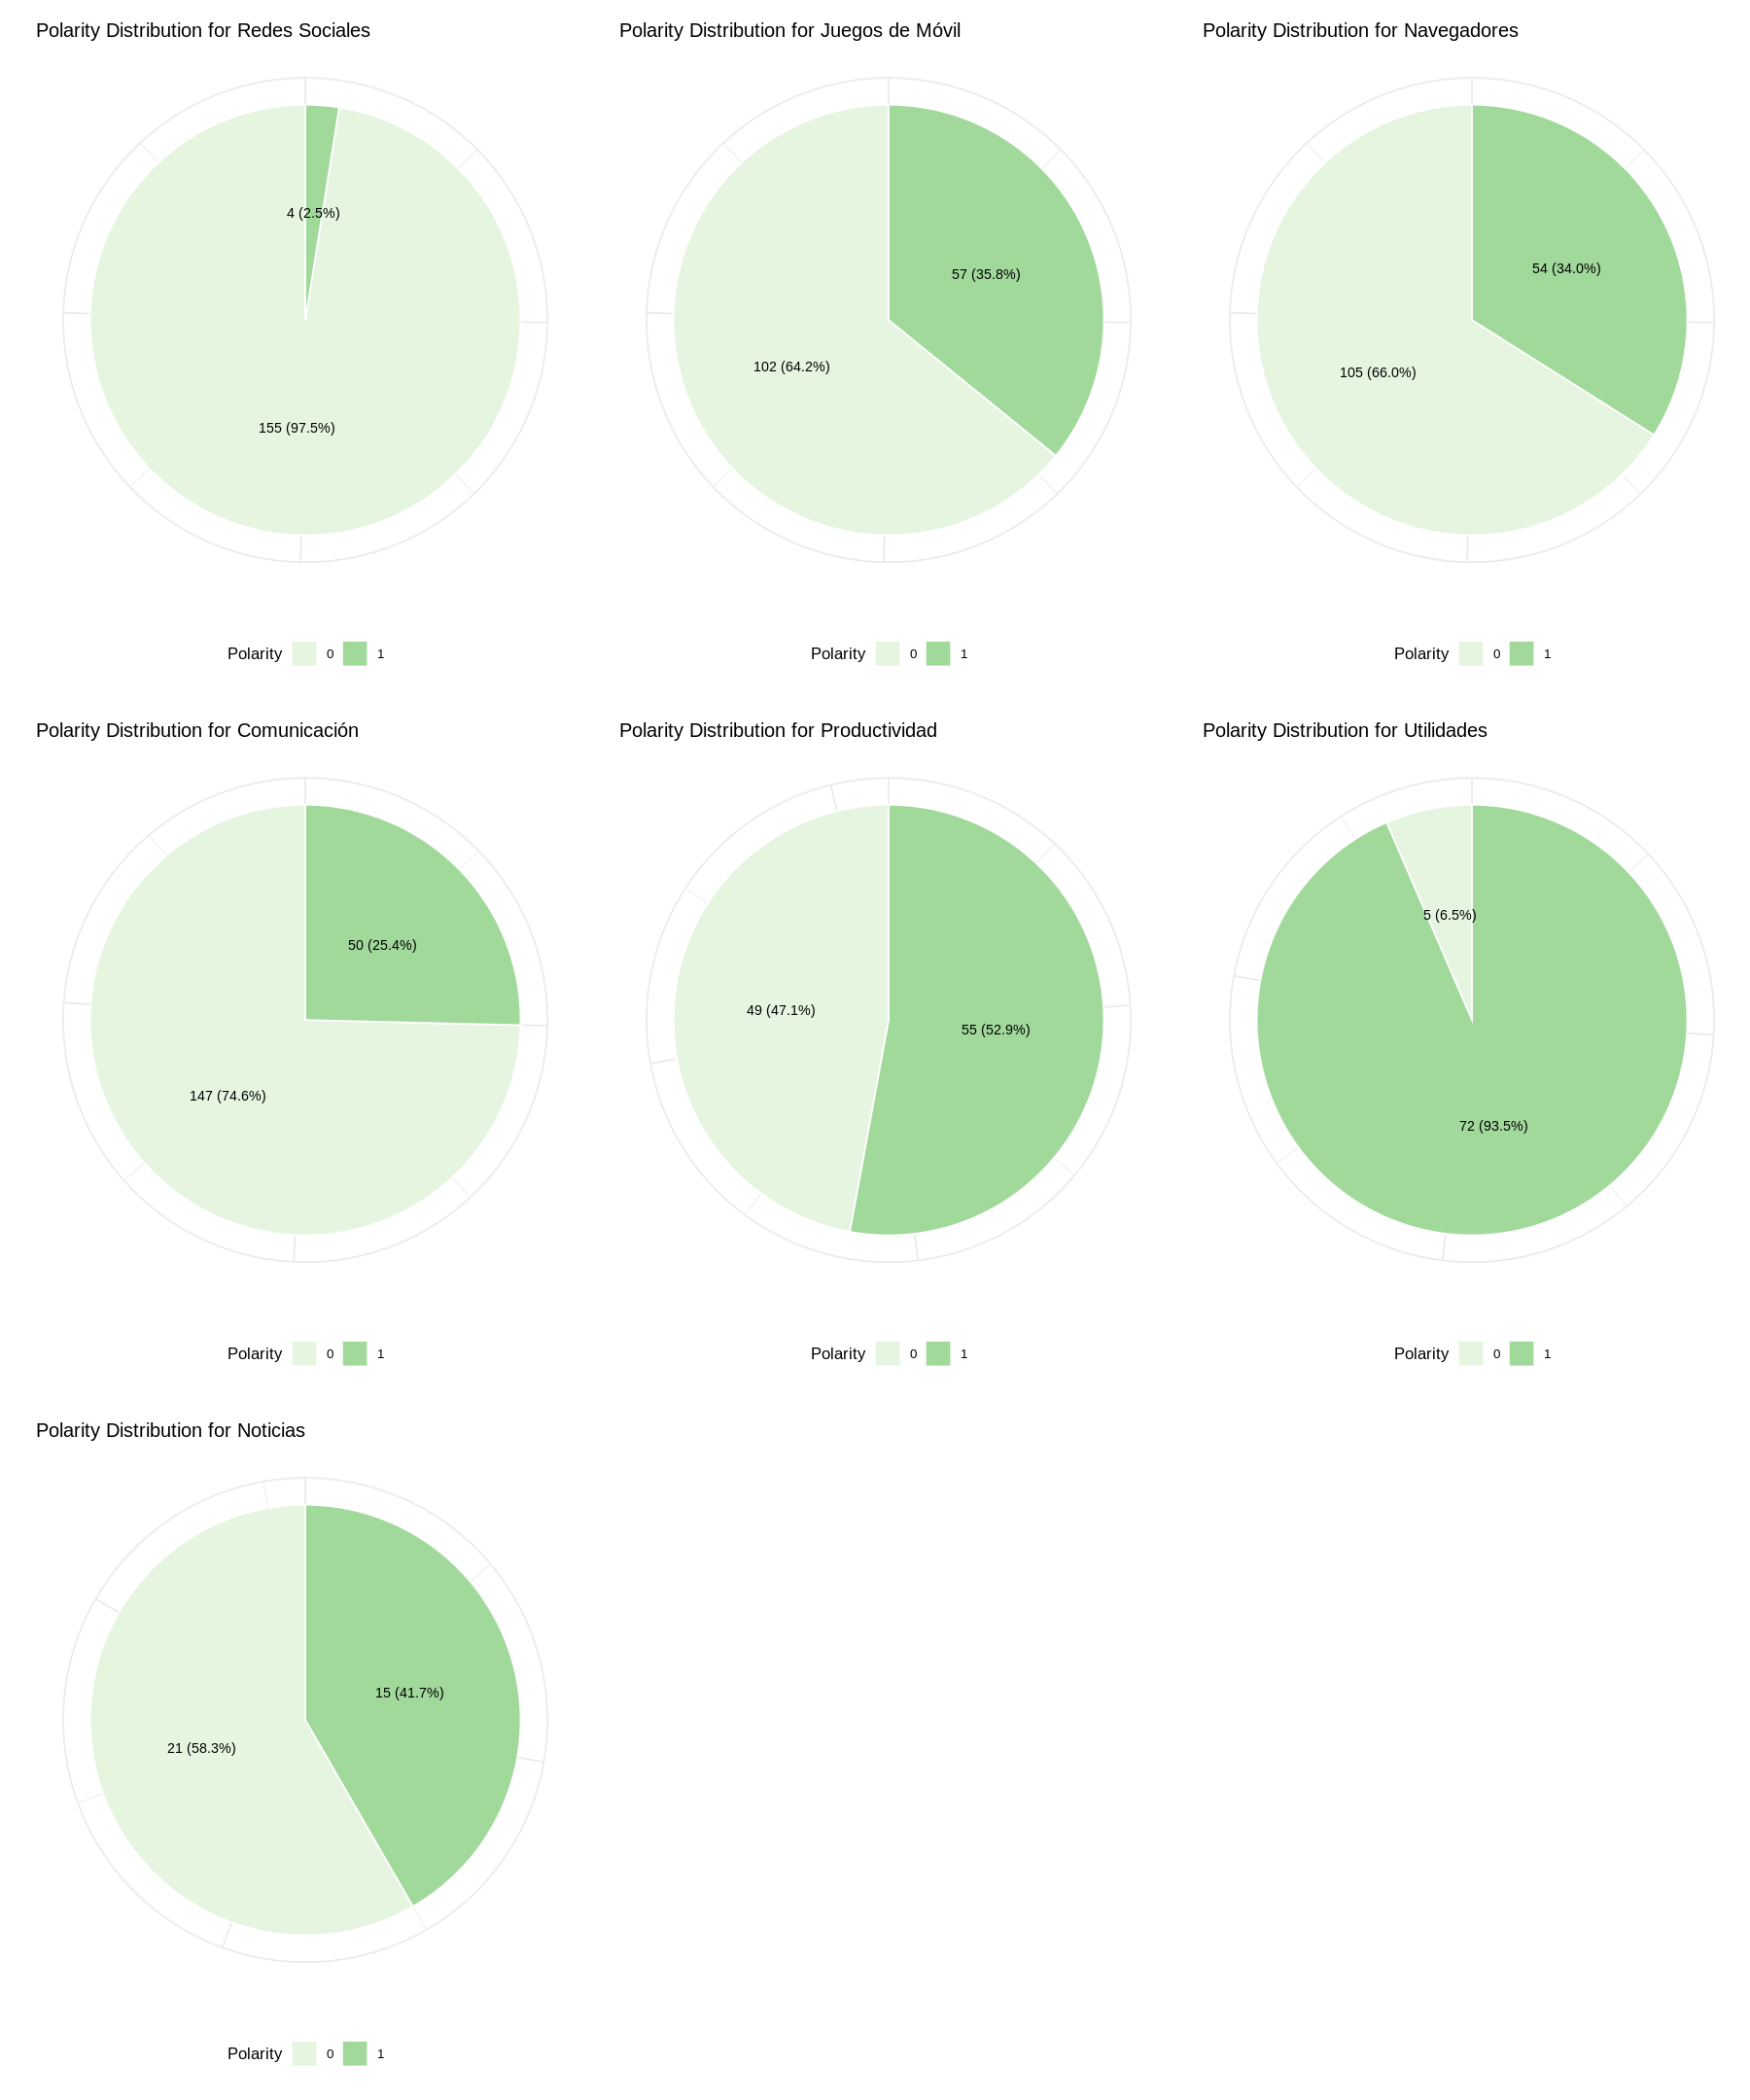

In [336]:
graficos_pie <- list()

for (app_class in unique(data$App)) {
  subset_data <- data[data$App == app_class, ]

  pie_chart <- ggplot(subset_data, aes(x = "", fill = as.factor(polarity))) +
    geom_bar(stat = "count", width = 1, color = "white") +
    coord_polar("y") +
    scale_fill_brewer(palette = "Greens") +
    labs(x = "", y = "", fill = "Polarity") +
    theme_minimal() +
    theme(legend.position = "bottom", text = element_text(size = 10), axis.text.x = element_blank()) +
    geom_text(
      stat = "count",
      aes(label = sprintf("%d (%.1f%%)", ..count.., ..count.. / sum(..count..) * 100)),
      position = position_stack(vjust = 0.5),
      size = 3
    ) +
    ggtitle(paste("Polarity Distribution for", app_class))

  graficos_pie[[length(graficos_pie) + 1]] <- pie_chart
}

# Adjust the number of columns based on the layout you prefer
options(repr.plot.width = 15, repr.plot.height = 18)
grid.arrange(grobs = graficos_pie, ncol = 3)


In [339]:
matriz_app_train<- model.matrix(~ 0 + App, data = data.train)
matriz_app_train <- as.data.frame(matriz_app_train)
matriz_app_test <- model.matrix(~ 0 + App, data = data.test)
matriz_app_test <- as.data.frame(matriz_app_test)

head(matriz_app_test)
head(matriz_app_train)

,AppComunicación,AppJuegos de Móvil,AppNavegadores,AppNoticias,AppProductividad,AppRedes Sociales,AppUtilidades
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,0,0,0,0,0,1,0
28,0,0,0,0,0,1,0
38,0,0,0,0,0,1,0
45,0,0,0,0,0,1,0
46,0,0,0,0,0,1,0
51,0,0,0,0,0,1,0


,AppComunicación,AppJuegos de Móvil,AppNavegadores,AppNoticias,AppProductividad,AppRedes Sociales,AppUtilidades
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0


Si nos fijamos en la observación 1 en el head() que hemos hecho al descargarnos los datos al inicio de todo el análisis, veremos que esa observación era de facebook una red social que es como está clasificada en la matriz_app_train

In [340]:
# Juntamos las dos matrizes
dataframe_reducedtrain <- as.data.frame(reduced_matriz.train)
dataframe_reducedtest <- as.data.frame(reduced_matriz.test)

In [341]:
cruzadas_train <- cbind(matriz_app_train, dataframe_reducedtrain)
cruzadas_test <- cbind(matriz_app_test, dataframe_reducedtest)

head(cruzadas_test)
ncol(cruzadas_test)

,AppComunicación,AppJuegos de Móvil,AppNavegadores,AppNoticias,AppProductividad,AppRedes Sociales,AppUtilidades,abil,abl,absolut,⋯,wrong,wtf,wth,yahoo,year,yes,yet,youtub,zenfon,zoom
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
18,0,0,0,0,0,1,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
38,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 1241

A continuación lo que necesitamos previo a la creación del modelo es cruzar estas dos matrices. Lo que obtenemos ahora es una matrice de 1241 columnas donde cada observación toma un valor 1 en el caso de que aparezca en alguno de los tipos de aplicaciones que son las primeras 7 columnas y en el caso de que su texto contenga alguna de las demás 1234 columnas que son las palabras que estamos estudiando.

Si nos fijamos, sumando estos dos valores nos sale el número total de columnas que tiene esta matriz 1241 (al hacer el head de esta nos aparece 6x1241).

También había provado de hacer el modelo con todas las aplicaciones y esta simplificación y clasificación de las matrizes reduce de 23 a 7 las columnas que tenemos que crear en este paso.

In [343]:
# Creamos el modelo con un loop para ver el mejor valor de Laplace
for (i in (1:10))
 {
    print(paste0("Laplace factor of ", as.character((i-1)/4)))

    modelo4 = naiveBayes(cruzadas_train, data.train$polarity, laplace = (i-1)/4)

    predicciones4 = predict(modelo4, cruzadas_test)

    print(confusionMatrix(predicciones4, data.test$polarity))
 }

[1] "Laplace factor of 0"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 91 17
         1 25 44
                                          
               Accuracy : 0.7627          
                 95% CI : (0.6931, 0.8233)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 0.001329        
                                          
                  Kappa : 0.4905          
                                          
 Mcnemar's Test P-Value : 0.280087        
                                          
            Sensitivity : 0.7845          
            Specificity : 0.7213          
         Pos Pred Value : 0.8426          
         Neg Pred Value : 0.6377          
             Prevalence : 0.6554          
         Detection Rate : 0.5141          
   Detection Prevalence : 0.6102          
      Balanced Accuracy : 0.7529          
                                          
       'Positive' Class : 0               
          

Los resultados de este modelo siguen una tendencia bastante similar a lo que veíamos anteriormente. Una diferencia importante con las opcines que hemos visto anteriormente es que al incluir la variable app, hemos reducido la precisión de la clase 1, en líneas generales la precisión de los modelos es parecida a la de los modelos anteriores, pero si que es cierto que en modelos anteriores nos costaba menos precisión total llegar a una precisión practicamente perfecta en la clase 1 que es la que más nos interesa.

# Conclusiones

En esta entrega nos hemos dedicado a hacer un análisis de las 'reviews' de distintas aplicaciones y ver qué grado de polarización tenían. Para hacerlo hemos empezado viendo el desbalance que existía dentro de la clase polarity, primero en su conjunto y luego en cada una de las distintas aplicaciones.

Después hemos hecho un extenso trabajo de tratado de datos en el que nos hemos encargado de transformar todo el texto de las 'reviews' en datos analizables por el model Naive Bayes.

Para hacer el modelo, primero hemos tenido que transformar los datos un poco más, consiguiendo una matriz binaria y luego dividiendo nuestros conjuntos entre el train y el test. A partir, de aquí se ha podido realizar el modelo que nos ha dado unos resultados bastante aceptables. Pero con diferencias en las predicciones de las clases, fallaba bastante más en la clase de valor 1. Justo esto es una mala noticia porque, bajo mi punto de vista, la clase 1 es la más interesante, para ver si la tan comentada polarización de nuestra época había llegado también a estos comentarios.

Para optimizar el modelo, hemos visto el funcionamiento del Factor de Laplace, del que hemos probado todas las posibilidades de entre 0 y 2 con intervalos de 0,25. A partir de aquí observando los resultados se ve que la precisión de los modelos disminuía conforme aumentaba el factor, pero a su vez, la calidad de las clasificaciones de la clase dos aumentaba. Es por eso que me ha parecido que el modelo con factor Laplace igual a 1 era un modelo interesante, que seguía con casi un 70% de precisión total, pero rozaba el 99% de precisión en la clase 1.

Además, en ambos modelos hemos querido observar como eran las observaciones que se clasificaban mal, para poder intentar entender que sucedía y porque los modelos no lo predecían correctamente.

Por último, hemos querido crear un último modelo teniendo en cuenta la variable que nos daba información sobre la aplicación de la que eran las 'reviews'. Para ello, y pasando por encima, muy al principio del análisis se ha creado una variable nueva llamada 'app' que clasificaba las aplicaciones donde estaban las reviews por tipo de app. Después hemos querido investigar que efecto podía tener esta variable en nuestro nuevo modelo.

Para ello se han tenido que tratar otra vez los datos, usando el 'one-hot encoding' de todas las variables y transformándolas en binarias, con una matriz de una columna por aplicación. Después de esto hemos cruzado esta matriz con la que ya teníamos del texto y propuesto otro modelo con un loop interando entre los mismos valores de Laplace que al inicio. El resultado no ha sido demasiado bueno, aunque la precisión general no se ve afectada. Perdemos efectividad en la predicción de la clase 1.

Es por esto que creo que en lineas generales los modelos que mejor funcionan son los que estan entre los valores 0,25 y 1 de Laplace sin tener en cuenta la variable 'app'.